## 下準備

In [1]:
#! pip install japanize-matplotlib

In [2]:
import json
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import date
import datetime

#jsonファイルを開く
with open('firestore-export2.json','r',encoding="utf-8_sig") as f:
    js = json.load(f)

In [3]:
def Frequency_Distribution(data, class_width=None):#度数分布表を生成
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)

    bins = np.arange(0, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))
def flatten(nested_list):
    """2重のリストをフラットにする関数"""
    return [e for inner_list in nested_list for e in inner_list]

In [4]:
#ユーザー数
num=len(js)

In [5]:
#確認
js

[{'uid': 'e09s43v2n4',
  'questionAnswer': {'0': ['はい'],
   '1': ['はい'],
   '2': ['いいえ'],
   '3': ['いいえ'],
   '4': ['はい'],
   '5': ['はい'],
   '6': ['はい'],
   '7': ['いいえ'],
   '8': ['食べない'],
   '9': ['飲まない'],
   '10': ['自分以外'],
   '11': ['はい'],
   '12': ['コンディショニング(疲労の回復、パフォーマンスの向上等)', 'ダイエット', '体力の維持、向上'],
   '13': ['いいえ'],
   '14': ['ほとんど変化なし'],
   '15': ['できれば減らしたい'],
   '16': ['５〜６時間未満'],
   '17': ['1日に1回以上'],
   '18': ['いいえ'],
   '19': ['食生活を改善することは考えていない'],
   '20': ['データや根拠を元にしたサポート'],
   '21': ['特になし'],
   '22': ['そば', '卵'],
   '23': ['特になし']},
  'userType': '承認ープロセス',
  'age': 19,
  'sex': '女性',
  'height': 176,
  'records': [{'weight': 83.6,
    'muscle': '',
    'bodyFatPercentage': 32.2,
    'date': '2/27'},
   {'weight': 82.75,
    'muscle': '',
    'bodyFatPercentage': 31.8,
    'date': '4/12'}]},
 {'uid': 'gAJUOAzEUw',
  'questionAnswer': {'0': ['はい'],
   '1': ['いいえ'],
   '2': ['はい'],
   '3': ['はい'],
   '4': ['はい'],
   '5': ['いいえ'],
   '6': ['はい'],
   '7': ['はい'],
   '8':

## DateFrame作成

### ユーザデータ

In [6]:
#初期化
i = 0
lis=[]
err_user=[]
no_record_user=[]

#空のdf作成
user= pd.DataFrame(index=[],columns=["uid","userType","age","sex","height","initial_weight"])

for  i in range(num) :
    try:
        for j in ["uid","userType","age","sex","height"]:
        #ユーザーごとの情報をリストに格納
            lis.append(js[i][j])
            
        lis.append(float(js[i]["records"][0]["weight"]))#最初のデータの体重を取得
        user.loc[i]=lis#1列ずつqueに追加
    except IndexError:#recordsがない場合
        no_record_user.append(js[i]["uid"])#確認用に、エラーが起きた列はリストに格納
        continue
    except Exception as e :#エラーが起きたら飛ばす
        err_user.append(js[i]["uid"])#確認用に、エラーが起きた列はリストに格納
        continue
    finally:
        lis=[]#初期化
print(err_user)#何らかのエラー（下で解明）
print(no_record_user)#エラーが起きた列を取得(体重データなし)
user.head()#データフレームを取得

['wEV7Et5oMF', 's0RYpiAT0D', 'F3snLioj12', 'Lcx7PFFxQA', 'aQ3ufid3bJ', 'cM8vEHxAEQ', 'LA7dHRRhyJ', 'Q0gPw7nk6n', 'VYuchCwrJp', 'LrdNc6ni8G', 'iGXSEHFRPK', 'GmOx2VZfLU', 'nPhL3E7NtH']
['gAJUOAzEUw', 'XWB07ZusmB', 'dkotTRIfys', 'BworPhwQZ0', 'Dg8Xcr38eP', 'mF2ZUN3J6n', 'qzbnCxqS5y', '0Gb1QDP1ZP', 'vUSsmniWLd', 'CAe3dpjUay', '8GZBH6mHmI', 'GBWDXfIq40', 'eCcn1hgBjO', 'VJE48Ayi9u', 'zbUcifc5XE', 'o5581anRaV', 'L6qWCUcVUV', 'nAVPZRG867', '7mBLtjlnxH', '6KEUYsxcR3', 'ZbBTrpGcwX', 'T6VzyoO4sb', 'JhCrgqfQab', '9qUSqRa3Ul', 'oJiFqJ6vsE', '97lrYPJAND', 'JpPOjNbPLL', 'Tte4Ui0SEH', 'gdkuKMBlYg', 'KDQvV4fu5g', 'I2rF6SpKyY', 'cNCCN6zqz2', 'GhVo0SGnYn', 'lpsj7oHawa', 'VTlwwR09F2', '1ocnhSwsru', 'tw8kK03PXN', '4DZuzCakEh', 'tHCZYnbnRQ', 'spe6PNexCm', 'td9HgSBw0I', 'jZXBz3y9lO', 'Li6pU1MA5H', 'H1QkoolHMR', 'a5TO2rbC3v', 'gE9odlqHM6', 'hBptqt9wML', 'Tl6ITFfJXE', '1JzDsRs6UU', '24j1P07Uzr', 'T4doMlT3TQ', 's6AVetxBuk', 'GRbl8dD6oO', 'l8TyH7cMV8', 'tcYdwimN8N', 'hF98L1G6rT', 'Fo5IZ7kBYF', 'ZVDRtxifZ0', 'YW2

uid userType  age sex  height  initial_weight
0   e09s43v2n4  承認ープロセス   19  女性   176.0            83.6
2   4pTOkmK2tI    承認ー結果   59  女性   153.0            51.0
8   EoLhGaDV2H    結論ー結果   22  男性   172.0            67.9
9   Dz47wvXrNr  承認ープロセス   38  女性   156.0            48.0
11  Tq6ZKWvBuw    結論ー結果   53  女性   162.0            49.0

In [7]:
#エラーの原因を探る
js[23]["records"]

[{'weight': '', 'muscle': '', 'bodyFatPercentage': '', 'date': '7/18'},
 {'weight': 1, 'muscle': 1, 'bodyFatPercentage': 0.4, 'date': '7/20'},
 {'weight': 61.3, 'muscle': '', 'bodyFatPercentage': '', 'date': '8/3'},
 {'weight': 60.1, 'muscle': '', 'bodyFatPercentage': 37.3, 'date': '8/9'},
 {'weight': 59.7, 'muscle': '', 'bodyFatPercentage': 37.3, 'date': '8/17'}]

- 最初のレコードに体重が含まれない

In [8]:
#初期BMIを算出
initial_bmi=user["initial_weight"]/((user["height"]*user["height"])/10000)
initial_bmi

0      26.988636
2      21.786492
8      22.951595
9      19.723866
11     18.670934
         ...    
477    22.927470
478    22.347782
479    27.136022
480    25.661888
481    23.728191
Length: 390, dtype: float64

In [9]:
#初期BMIをuserに追加
user["initial_bmi"]=initial_bmi
user

uid userType  age sex  height  initial_weight  initial_bmi
0    e09s43v2n4  承認ープロセス   19  女性   176.0            83.6    26.988636
2    4pTOkmK2tI    承認ー結果   59  女性   153.0            51.0    21.786492
8    EoLhGaDV2H    結論ー結果   22  男性   172.0            67.9    22.951595
9    Dz47wvXrNr  承認ープロセス   38  女性   156.0            48.0    19.723866
11   Tq6ZKWvBuw    結論ー結果   53  女性   162.0            49.0    18.670934
..          ...      ...  ...  ..     ...             ...          ...
477  P5MhVJgb3c    承認ー結果   55  女性   161.5            59.8    22.927470
478  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782
479  OeGWdyTCo4    根拠ー結果   55  女性   155.6            65.7    27.136022
480  QSTOOBiwiY    根拠ー結果   47  女性   163.5            68.6    25.661888
481  M6vZywkTEG    承認ー結果   34  女性   165.0            64.6    23.728191

[390 rows x 7 columns]

In [10]:
#欠損確認
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 481
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             390 non-null    object 
 1   userType        390 non-null    object 
 2   age             390 non-null    int64  
 3   sex             390 non-null    object 
 4   height          390 non-null    float64
 5   initial_weight  390 non-null    float64
 6   initial_bmi     390 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.4+ KB


### 体組成データ

In [11]:
col1 = ["uid","weight","muscle","bodyFatPercentage","height","date"]
record=[]
li=[]
err_body=[]
for i in range(num):
    li = js[i]["records"]
    for j in range(len(js[i]["records"])):
          li[j]["uid"] = js[i]["uid"]
          li[j]["height"]=float(js[i]["height"])
    #print(li)
    try:
        record.append(li) 
    except Exception as e :#エラーが起きたら飛ばす
        err_body.append(i)#確認用に、エラーが起きた列はリストに格納
        continue
#print(list(itertools.chain.from_iterable(record)))
print(err_body)
body=pd.DataFrame(index=[],columns=col1)
body=body.append(list(itertools.chain.from_iterable(record)),ignore_index=True)
body

[]


C:\Users\ishik\AppData\Local\Temp\ipykernel_40804\154587039.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  body=body.append(list(itertools.chain.from_iterable(record)),ignore_index=True)


uid weight muscle bodyFatPercentage  height  date
0      e09s43v2n4   83.6                     32.2   176.0  2/27
1      e09s43v2n4  82.75                     31.8   176.0  4/12
2      4pTOkmK2tI     51                     28.2   153.0  7/30
3      EoLhGaDV2H   67.9   34.2              13.2   172.0   6/3
4      EoLhGaDV2H   68.2   34.3              13.3   172.0  6/10
...           ...    ...    ...               ...     ...   ...
15770  M6vZywkTEG   70.2   42.5                36   165.0  1/30
15771  M6vZywkTEG   70.2   42.7              35.9   165.0  1/31
15772  M6vZywkTEG   70.5   42.4              35.6   165.0   2/1
15773  M6vZywkTEG   70.5   42.2              36.6   165.0   2/2
15774  M6vZywkTEG   70.4   42.5              36.2   165.0   2/4

[15775 rows x 6 columns]

In [12]:
#データをフロート型で統一
body['weight'] = pd.to_numeric(body['weight'],errors = 'coerce')
body['muscle'] = pd.to_numeric(body['muscle'],errors = 'coerce')
body['bodyFatPercentage'] = pd.to_numeric(body['bodyFatPercentage'],errors = 'coerce')
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15775 entries, 0 to 15774
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                15775 non-null  object 
 1   weight             15712 non-null  float64
 2   muscle             6988 non-null   float64
 3   bodyFatPercentage  11949 non-null  float64
 4   height             15775 non-null  float64
 5   date               15773 non-null  object 
dtypes: float64(4), object(2)
memory usage: 739.6+ KB


In [13]:
#bmiを算出、追加
body["bmi"]=body["weight"]/((body["height"]*body["height"])/10000)
body

uid  weight  muscle  bodyFatPercentage  height  date        bmi
0      e09s43v2n4   83.60     NaN               32.2   176.0  2/27  26.988636
1      e09s43v2n4   82.75     NaN               31.8   176.0  4/12  26.714230
2      4pTOkmK2tI   51.00     NaN               28.2   153.0  7/30  21.786492
3      EoLhGaDV2H   67.90    34.2               13.2   172.0   6/3  22.951595
4      EoLhGaDV2H   68.20    34.3               13.3   172.0  6/10  23.053002
...           ...     ...     ...                ...     ...   ...        ...
15770  M6vZywkTEG   70.20    42.5               36.0   165.0  1/30  25.785124
15771  M6vZywkTEG   70.20    42.7               35.9   165.0  1/31  25.785124
15772  M6vZywkTEG   70.50    42.4               35.6   165.0   2/1  25.895317
15773  M6vZywkTEG   70.50    42.2               36.6   165.0   2/2  25.895317
15774  M6vZywkTEG   70.40    42.5               36.2   165.0   2/4  25.858586

[15775 rows x 7 columns]

### 質問データ

In [14]:
#カラム名をリスト化
col = ["uid"]
for i in range(24):
    col.append(str(i))
col.append("userType")

#空のDataFrameを作成
que = pd.DataFrame(index=[],columns=col)

#DataFrameに格納
i = 0
lis=[]
err_que=[]
for  i in range(num) :
    try:
        #ユーザーごとの情報をリストに格納
        lis.append(js[i]["uid"])
        for j in range(24):
            lis.append(js[i]["questionAnswer"][str(j)])
        lis.append(js[i]["userType"])
        que.loc[i]=lis#1列ずつqueに追加
    except Exception as e :#エラーが起きたら飛ばす
        err_que.append(js[i]["uid"])#確認用に、エラーが起きた列はリストに格納
        continue
    finally:
        lis=[]
print(err_que)#エラーが起きた列を取得
que.head()#データフレームを取得

['lbxP5PESk6', 'RpHALKXLtk']


uid     0      1      2      3     4      5     6      7         8  \
0  e09s43v2n4  [はい]   [はい]  [いいえ]  [いいえ]  [はい]   [はい]  [はい]  [いいえ]    [食べない]   
1  gAJUOAzEUw  [はい]  [いいえ]   [はい]   [はい]  [はい]  [いいえ]  [はい]   [はい]      [朝食]   
2  4pTOkmK2tI  [はい]  [いいえ]   [はい]   [はい]  [はい]  [いいえ]  [はい]  [いいえ]  [昼食, 夕食]   
3  XWB07ZusmB  [はい]   [はい]   [はい]   [はい]  [はい]   [はい]  [はい]   [はい]    [食べない]   
4  dkotTRIfys  [はい]   [はい]  [いいえ]  [いいえ]  [はい]  [いいえ]  [はい]  [いいえ]      [昼食]   

   ...           15         16           17     18  \
0  ...  [できれば減らしたい]  [５〜６時間未満]    [1日に1回以上]  [いいえ]   
1  ...  [できれば減らしたい]    [５時間未満]  [2〜3日に1回程度]   [はい]   
2  ...  [できれば減らしたい]  [５〜６時間未満]    [1日に1回以上]  [いいえ]   
3  ...  [できれば減らしたい]    [５時間未満]    [1日に1回以上]   [はい]   
4  ...  [できれば減らしたい]  [６〜７時間未満]    [1日に1回以上]  [いいえ]   

                                     19                          20  \
0                   [食生活を改善することは考えていない]           [データや根拠を元にしたサポート]   
1  [食生活を改善した方がいいとは思っているが、実際に食生活を変えていない]  [褒められたり、共感されたりすることが多いサポート]   
2                 [既に改善に取り組んでいる（６ヶ月以上）]          [早く結果につながるためのサポート]   
3                   [食生活を改善することは考えていない]          [早く結果につながるためのサポート]   
4  [食生活を改善した方がいいとは思っているが、実際に食生活を変えていない]          [早く結果につながるためのサポート]   

                   21                                               22  \
0              [特になし]                                          [そば, 卵]   
1  [肥満症/メタボリックシンドローム]  [糖尿病, 脂質異常症（高脂血症）, もも, 豚肉, バナナ, まつたけ, 特になし, えび]   
2              [特になし]                                           [特になし]   
3              [特になし]                                           [特になし]   
4              [特になし]                                           [特になし]   

                                                  23 userType  
0                                             [特になし]  承認ープロセス  
1  [できる限り自炊するようにしている, 高血圧, 塩分や脂質を摂り過ぎないように意識している,...    承認ー結果  
2  [塩分や脂質を摂り過ぎないように意識している, 甘いものを控えるようにしている, 野菜を多く...    承認ー結果  
3                                 [できる限り自炊するようにしている]    結論ー結果  
4  [塩分や脂質を摂り過ぎないように意識している, タンパク質を多く摂るようにしている, 野菜を...    結論ー結果  

[5 rows x 26 columns]

In [15]:
#欠損確認
que.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 481
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uid       480 non-null    object
 1   0         480 non-null    object
 2   1         480 non-null    object
 3   2         480 non-null    object
 4   3         480 non-null    object
 5   4         480 non-null    object
 6   5         480 non-null    object
 7   6         480 non-null    object
 8   7         480 non-null    object
 9   8         480 non-null    object
 10  9         480 non-null    object
 11  10        480 non-null    object
 12  11        480 non-null    object
 13  12        480 non-null    object
 14  13        480 non-null    object
 15  14        480 non-null    object
 16  15        480 non-null    object
 17  16        480 non-null    object
 18  17        480 non-null    object
 19  18        480 non-null    object
 20  19        480 non-null    object
 21  20        480 no

## データ選抜


### 欠損のあるデータ

In [16]:
#3つのテーブル作成時の欠損データをまとめる
drop_lis_nan=tuple(err_body)+tuple(err_user)+tuple(no_record_user)+tuple(err_que)
drop_lis_nan

('wEV7Et5oMF',
 's0RYpiAT0D',
 'F3snLioj12',
 'Lcx7PFFxQA',
 'aQ3ufid3bJ',
 'cM8vEHxAEQ',
 'LA7dHRRhyJ',
 'Q0gPw7nk6n',
 'VYuchCwrJp',
 'LrdNc6ni8G',
 'iGXSEHFRPK',
 'GmOx2VZfLU',
 'nPhL3E7NtH',
 'gAJUOAzEUw',
 'XWB07ZusmB',
 'dkotTRIfys',
 'BworPhwQZ0',
 'Dg8Xcr38eP',
 'mF2ZUN3J6n',
 'qzbnCxqS5y',
 '0Gb1QDP1ZP',
 'vUSsmniWLd',
 'CAe3dpjUay',
 '8GZBH6mHmI',
 'GBWDXfIq40',
 'eCcn1hgBjO',
 'VJE48Ayi9u',
 'zbUcifc5XE',
 'o5581anRaV',
 'L6qWCUcVUV',
 'nAVPZRG867',
 '7mBLtjlnxH',
 '6KEUYsxcR3',
 'ZbBTrpGcwX',
 'T6VzyoO4sb',
 'JhCrgqfQab',
 '9qUSqRa3Ul',
 'oJiFqJ6vsE',
 '97lrYPJAND',
 'JpPOjNbPLL',
 'Tte4Ui0SEH',
 'gdkuKMBlYg',
 'KDQvV4fu5g',
 'I2rF6SpKyY',
 'cNCCN6zqz2',
 'GhVo0SGnYn',
 'lpsj7oHawa',
 'VTlwwR09F2',
 '1ocnhSwsru',
 'tw8kK03PXN',
 '4DZuzCakEh',
 'tHCZYnbnRQ',
 'spe6PNexCm',
 'td9HgSBw0I',
 'jZXBz3y9lO',
 'Li6pU1MA5H',
 'H1QkoolHMR',
 'a5TO2rbC3v',
 'gE9odlqHM6',
 'hBptqt9wML',
 'Tl6ITFfJXE',
 '1JzDsRs6UU',
 '24j1P07Uzr',
 'T4doMlT3TQ',
 's6AVetxBuk',
 'GRbl8dD6oO',
 'l8TyH7cM

In [17]:
#形を確認してデータを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @drop_lis_nan")
user=user.query("uid not in @drop_lis_nan")
que=que.query("uid not in @drop_lis_nan")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {15775,403,390,2}
{body,body(uid),user,que} : {15419,388,388,2}


### レコード数

階級値   度数  累積度数      相対度数    累積相対度数
階級                                              
0以上10未満       5.0  162   162  0.417526  0.417526
10以上20未満     15.0   47   209  0.121134  0.538660
20以上30未満     25.0   29   238  0.074742  0.613402
30以上40未満     35.0   20   258  0.051546  0.664948
40以上50未満     45.0   18   276  0.046392  0.711340
50以上60未満     55.0   13   289  0.033505  0.744845
60以上70未満     65.0   15   304  0.038660  0.783505
70以上80未満     75.0   12   316  0.030928  0.814433
80以上90未満     85.0    7   323  0.018041  0.832474
90以上100未満    95.0   16   339  0.041237  0.873711
100以上110未満  105.0    8   347  0.020619  0.894330
110以上120未満  115.0    5   352  0.012887  0.907216
120以上130未満  125.0    8   360  0.020619  0.927835
130以上140未満  135.0    7   367  0.018041  0.945876
140以上150未満  145.0    6   373  0.015464  0.961340
150以上160未満  155.0    3   376  0.007732  0.969072
160以上170未満  165.0    1   377  0.002577  0.971649
170以上180未満  175.0    0   377  0.000000  0.971649
180以上190未満  185.0    1   378  0.002577  0.974227
190以上200未満  195.0    2   380  0.005155  0.979381
200以上210未満  205.0    2   382  0.005155  0.984536
210以上220未満  215.0    1   383  0.002577  0.987113
220以上230未満  225.0    1   384  0.002577  0.989691
230以上240未満  235.0    0   384  0.000000  0.989691
240以上250未満  245.0    2   386  0.005155  0.994845
250以上260未満  255.0    1   387  0.002577  0.997423
260以上270未満  265.0    0   387  0.000000  0.997423
270以上280未満  275.0    1   388  0.002577  1.000000

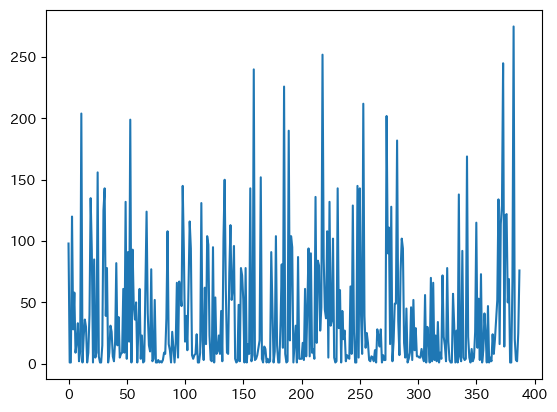

In [18]:
#ユーザごとの体重のレコード数
weightcount=list(body.groupby("uid").count()["weight"])
#体重のレコード数で度数分府表を作成
display(Frequency_Distribution(weightcount,10))

#ユーザごとのレコード数を確認
#plt.bar(list(range(len(weightcount))),weightcount)
plt.plot(weightcount)
plt.show()

レコード数が10以上のユーザーを分析対象とする

In [19]:
lim=body.groupby("uid").count()[["weight"]] > 10
drop_lis_record=list(lim.query('weight == False').index)

In [20]:
drop_lis_record

['0UGyhH4Xib',
 '0Ukk1nNJJ2',
 '1IPU5LZTGQ',
 '1csEGzJCi1',
 '1oxeG4awZj',
 '2mHnqMflCp',
 '3llOxSvRMO',
 '428aSx8eQx',
 '4pTOkmK2tI',
 '5A41sNH1Ds',
 '5H5ZNkFx1C',
 '5t3bhIUSzI',
 '62mn5orQcl',
 '662Bx2U5N5',
 '7WMKvOnJBN',
 '7dFxKkLs1u',
 '7xxAJ3Ljws',
 '8BW4Yuw5mc',
 '8w4lpRWp3f',
 '8x01PUXKsO',
 '943AaQZywI',
 '9K8mA1b5bZ',
 '9erAM9FY4p',
 'A6IK9GmLRa',
 'An11v83TRP',
 'B1MOuiA7wa',
 'BG87zEpGRn',
 'BIvhNxVDSp',
 'CRbilJTnyd',
 'ChRflO8Vhz',
 'D11LDyBaLY',
 'DSuGQMbyCk',
 'DT2LgJtOPV',
 'DYO1arruG4',
 'DfcPe6fybM',
 'Dgb89oANBX',
 'DllIMzhD1n',
 'DuR0rmj6fI',
 'Dz47wvXrNr',
 'E7cco67ejc',
 'Exq9wJH9rw',
 'Fdb31Q4lU1',
 'Fq1Fv8mQd5',
 'I0ong3i8cW',
 'I7sAIkyCAK',
 'IAofWFC38M',
 'ISR8hmSfBt',
 'IhU8i8WUtr',
 'Ipi03sV97h',
 'IylXJXSIgc',
 'JRG04QzLC5',
 'KMqMFDyRyz',
 'KW1C2Hwkyj',
 'KhrwkScs4t',
 'L9BEJ1CYGx',
 'L9wdEM69x4',
 'Le4xRPlcRQ',
 'Li58PEedWf',
 'MDPszYZ70W',
 'MK3DZaEgQC',
 'MjkaJrG6JK',
 'Moom4vekjp',
 'MrHeXjFBoo',
 'N6Dr1I4hcd',
 'NaepzEW3zv',
 'O9Elhpc9I4',
 'OQsTTyeg

In [21]:
#body.groupby("uid").count()
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @drop_lis_record")
user=user.query("uid not in @drop_lis_record")
que=que.query("uid not in @drop_lis_record")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {15419,388,388,2}
{body,body(uid),user,que} : {14787,222,222,2}


### データ入力ミスについて

#### 身長

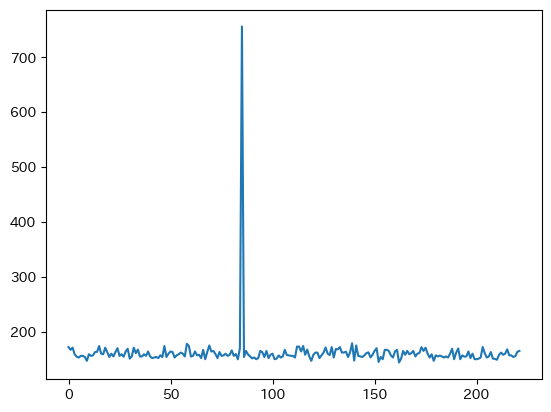

In [22]:
plt.plot(list(user["height"]))

- 一件明らかなミスが有る

In [23]:
#200cm以上を検索
over_height=list(user[user["height"]>200]["uid"])
over_height

['N80N1m69GC']

In [24]:
user.query('uid==@over_height')

uid userType  age sex  height  initial_weight  initial_bmi
234  N80N1m69GC    承認ー結果   56  女性   756.0            54.0     0.944822

- 756cmは明らかにおかしい

In [25]:
#データを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @over_height")
user=user.query("uid not in @over_height")
que=que.query("uid not in @over_height")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {14787,222,222,2}
{body,body(uid),user,que} : {14709,221,221,2}


#### 体重

In [26]:
list(body["weight"])

[67.9,
 68.2,
 66.7,
 66.7,
 66.1,
 66.7,
 66.3,
 66.2,
 66.1,
 66.1,
 67.3,
 64.6,
 65.6,
 66.0,
 67.6,
 68.6,
 82.8,
 82.4,
 82.1,
 81.4,
 82.5,
 82.3,
 81.6,
 81.6,
 81.8,
 81.5,
 81.3,
 80.9,
 80.4,
 80.7,
 80.2,
 80.4,
 80.1,
 79.7,
 79.7,
 80.1,
 81.1,
 80.4,
 80.0,
 62.5,
 61.6,
 61.4,
 62.0,
 63.2,
 62.1,
 61.3,
 61.4,
 61.7,
 62.1,
 62.6,
 62.5,
 62.1,
 62.6,
 61.9,
 62.1,
 62.5,
 62.1,
 62.9,
 61.6,
 62.3,
 62.0,
 62.4,
 62.1,
 84.7,
 84.5,
 84.7,
 84.8,
 84.2,
 84.0,
 84.5,
 84.0,
 83.7,
 83.4,
 84.4,
 84.5,
 84.4,
 84.5,
 84.8,
 33.8,
 83.7,
 83.4,
 84.4,
 85.3,
 84.8,
 84.7,
 84.5,
 83.7,
 84.2,
 85.2,
 84.4,
 84.7,
 84.4,
 84.0,
 84.7,
 84.1,
 85.6,
 85.1,
 84.9,
 84.5,
 59.7,
 58.8,
 58.3,
 57.8,
 57.5,
 57.5,
 58.0,
 58.4,
 58.0,
 57.5,
 57.5,
 57.2,
 57.7,
 57.4,
 56.8,
 57.2,
 56.7,
 57.3,
 57.0,
 57.4,
 56.8,
 57.4,
 57.1,
 57.1,
 56.7,
 57.0,
 57.1,
 56.7,
 56.4,
 56.3,
 55.5,
 65.9,
 65.1,
 65.5,
 65.1,
 64.7,
 65.0,
 64.4,
 64.4,
 65.3,
 64.8,
 65.8,
 64.9,
 64.3,

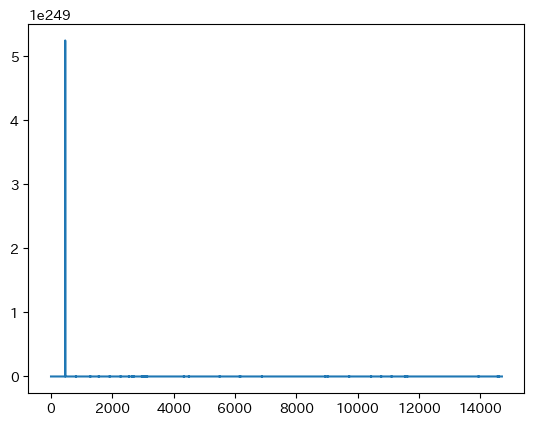

In [27]:
plt.plot(list(body["weight"]))

- 一件明らかなミス

In [28]:
over_weight=list(body[body["weight"]>150]["uid"])
over_weight

['lrbGHjn8Od']

In [29]:
body.query('uid=="lrbGHjn8Od" & weight > 150')

uid         weight  muscle  bodyFatPercentage  height  date  \
559  lrbGHjn8Od  5.250001e+249     NaN                NaN   157.0  6/30   

               bmi  
559  2.129904e+249

- 559を落とす

In [30]:
print(body.shape)
body=body.drop(559)
print(body.shape)

(14709, 7)
(14708, 7)


- 再度確認

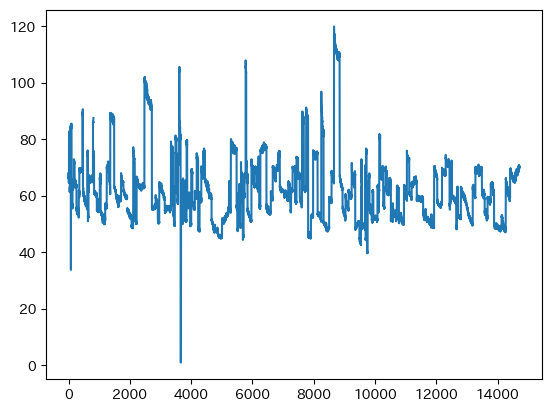

In [31]:
plt.plot(list(body["weight"]))

- 35以下はミスの可能性

In [32]:
#該当のuidを取得
under_weight=list(body[body["weight"]<35]["uid"])
under_weight

['3Qypwz2SXx',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX',
 'RLZoxpY0NX']

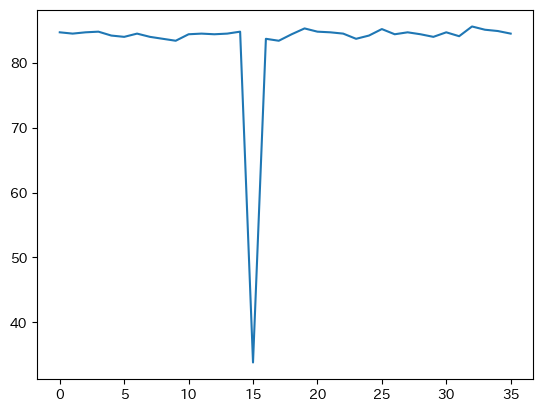

In [33]:
#3Qypwz2SXxの前後の体重の推移を確認する
plt.plot(list(body.query('uid=="3Qypwz2SXx"')["weight"]))

- 15番目のデータのみおかしいため、やはりミスである

In [34]:
body.query('uid=="3Qypwz2SXx" & weight < 40')

uid  weight  muscle  bodyFatPercentage  height  date        bmi
118  3Qypwz2SXx    33.8     NaN                NaN   159.0  9/10  13.369724

- 118を落とす

In [35]:
print(body.shape)
body=body.drop(118)
print(body.shape)

(14708, 7)
(14707, 7)


In [36]:
#RLZoxpY0NXのデータを確認する
body.query('uid=="RLZoxpY0NX"')

uid  weight  muscle  bodyFatPercentage  height   date       bmi
4122  RLZoxpY0NX     1.0     1.0                0.3   174.0  12/11  0.330295
4123  RLZoxpY0NX     1.0     1.0                0.3   174.0  12/12  0.330295
4124  RLZoxpY0NX     1.0     1.0                0.3   174.0  12/13  0.330295
4125  RLZoxpY0NX     1.0     1.0                0.2   174.0  12/14  0.330295
4126  RLZoxpY0NX     1.0     1.0                0.2   174.0  12/15  0.330295
4127  RLZoxpY0NX     1.0     1.0                0.3   174.0  12/16  0.330295
4128  RLZoxpY0NX     1.0     1.0                0.4   174.0  12/17  0.330295
4129  RLZoxpY0NX     1.0     1.0                0.4   174.0  12/18  0.330295
4130  RLZoxpY0NX     1.0     1.0                0.3   174.0  12/19  0.330295
4131  RLZoxpY0NX     1.0     1.0                0.2   174.0  12/20  0.330295
4132  RLZoxpY0NX     1.0     1.0                0.4   174.0  12/21  0.330295
4133  RLZoxpY0NX     1.0     1.0                0.4   174.0  12/22  0.330295

In [37]:
#データがおかしいのでこのユーザーを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query('uid !="RLZoxpY0NX"')
user=user.query('uid !="RLZoxpY0NX"')
que=que.query('uid !="RLZoxpY0NX"')
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {14707,221,221,2}
{body,body(uid),user,que} : {14695,220,220,2}


### 初期bmiについて

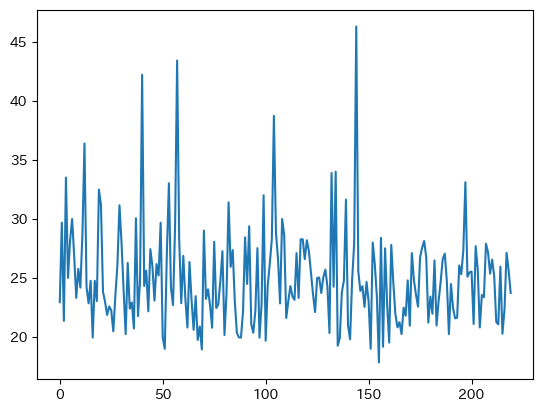

In [38]:
#初期bmiを可視化
plt.plot(list(user["initial_bmi"]))

- BMIが18.5より小さい人は痩せる必要なしのため落とす。

In [39]:
under_bmi=list(user[user["initial_bmi"] < 18.5]["uid"])
under_bmi

['SNmnfbbnfI']

In [40]:
body.query('uid==@under_bmi')

uid  weight  muscle  bodyFatPercentage  height  date        bmi
10512  SNmnfbbnfI    48.6     NaN                NaN   165.0  2/20  17.851240
10513  SNmnfbbnfI    49.4     NaN                NaN   165.0  2/21  18.145087
10514  SNmnfbbnfI    48.6     NaN                NaN   165.0  2/22  17.851240
10515  SNmnfbbnfI    48.9     NaN                NaN   165.0  2/23  17.961433
10516  SNmnfbbnfI    49.1     NaN                NaN   165.0  2/24  18.034894
...           ...     ...     ...                ...     ...   ...        ...
10611  SNmnfbbnfI    48.0     NaN                NaN   165.0  6/26  17.630854
10612  SNmnfbbnfI    49.1     NaN                NaN   165.0  6/27  18.034894
10613  SNmnfbbnfI    49.2     NaN                NaN   165.0  6/29  18.071625
10614  SNmnfbbnfI    48.4     NaN                NaN   165.0  6/30  17.777778
10615  SNmnfbbnfI    48.8     NaN                NaN   165.0   7/1  17.924702

[104 rows x 7 columns]

In [41]:
#データを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @under_bmi")
user=user.query("uid not in @under_bmi")
que=que.query("uid not in @under_bmi")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {14695,220,220,2}
{body,body(uid),user,que} : {14591,219,219,2}


## ダイエット目的の人に絞る

In [42]:
diet_user=que["12"].apply(lambda x: "ダイエット" in x)

In [43]:
drop_user=list(que[diet_user]["uid"])

In [44]:
#データを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid in @drop_user")
user=user.query("uid in @drop_user")
que=que.query("uid in @drop_user")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {14591,219,219,2}
{body,body(uid),user,que} : {13312,199,199,2}


## 体組成データについて

In [45]:
#datetime形式に変換
body["date"]=pd.to_datetime(body["date"], format='%m/%d')
body

uid  weight  muscle  bodyFatPercentage  height       date  \
3      EoLhGaDV2H    67.9    34.2               13.2   172.0 1900-06-03   
4      EoLhGaDV2H    68.2    34.3               13.3   172.0 1900-06-10   
5      EoLhGaDV2H    66.7    33.6               13.1   172.0 1900-06-21   
6      EoLhGaDV2H    66.7    33.6               13.3   172.0 1900-06-22   
7      EoLhGaDV2H    66.1    33.6               12.5   172.0 1900-06-23   
...           ...     ...     ...                ...     ...        ...   
15770  M6vZywkTEG    70.2    42.5               36.0   165.0 1900-01-30   
15771  M6vZywkTEG    70.2    42.7               35.9   165.0 1900-01-31   
15772  M6vZywkTEG    70.5    42.4               35.6   165.0 1900-02-01   
15773  M6vZywkTEG    70.5    42.2               36.6   165.0 1900-02-02   
15774  M6vZywkTEG    70.4    42.5               36.2   165.0 1900-02-04   

             bmi  
3      22.951595  
4      23.053002  
5      22.545971  
6      22.545971  
7      22.343158  
...          ...  
15770  25.785124  
15771  25.785124  
15772  25.895317  
15773  25.895317  
15774  25.858586  

[13312 rows x 7 columns]

In [46]:
#日付とbmiの最初からの差分を計算し、追加

#初期化
term=[]
bmi=[]
weight=[]
results=[]
new_user=[]
total_term={}
last_bmi={}
cases={}
for uid, group in body.groupby("uid"):#uidごとのテーブルを生成し、ユーザーごとに処理をする
    #リストのインデックスを振り直す
    group=group.reset_index(drop=True)
    
    #初期化
    term=[]
    bmi=[]
    weight=[]
    for i in range(len(group)):
        #差なので最初は0
        if i==0:
            x=0
            y=0
            z=0
        else:
            #差分を計算する
            x=(group.loc[i,"date"]-group.loc[0,"date"]).days
            if x<0:
                x=365+x#年を越したときは365から引く
            y=group.loc[i,"bmi"]-group.loc[0,"bmi"]
            z=group.loc[i,"weight"]-group.loc[0,"weight"]         

        #計算結果をリストに代入
        term.append(x)
        bmi.append(y)
        weight.append(z)
        
        #ユーザーごとの最後の結果データを取得し辞書化
        if i==len(group)-1:
            new_user.append({"uid":uid,"result_bmi":y,"total_term":x,"cases":len(group)})
            
    #カラムに計算データを追加    
    group["term"]=term
    group["bmi_dif"]=bmi
    group["weight_dif"]=weight
    results.append(group)#ユーザーごとのdfをリスト化
    
body2=pd.concat(results)#ユーザーごとのdfと1つに統合
body2=body2.reset_index()#インデックスを振り直す
body=body2
body.head(300)  

index         uid  weight  muscle  bodyFatPercentage  height       date  \
0        0  08NygOCesb    60.7    35.1               24.2   158.0 1900-10-31   
1        1  08NygOCesb    60.1    35.3               23.9   158.0 1900-11-01   
2        2  08NygOCesb    60.1    35.4               24.1   158.0 1900-11-02   
3        3  08NygOCesb    59.9    35.6               23.7   158.0 1900-11-03   
4        4  08NygOCesb    59.6    35.7               23.6   158.0 1900-11-04   
..     ...         ...     ...     ...                ...     ...        ...   
295     48  1BYKjkT1uj    66.5     NaN                NaN   150.0 1900-06-23   
296     49  1BYKjkT1uj    66.9     NaN                NaN   150.0 1900-06-24   
297     50  1BYKjkT1uj    67.0     NaN                NaN   150.0 1900-06-25   
298     51  1BYKjkT1uj    66.5     NaN                NaN   150.0 1900-06-26   
299     52  1BYKjkT1uj    66.4     NaN                NaN   150.0 1900-06-27   

           bmi  term   bmi_dif  weight_dif  
0    24.315014   0.0  0.000000         0.0  
1    24.074668   1.0 -0.240346        -0.6  
2    24.074668   2.0 -0.240346        -0.6  
3    23.994552   3.0 -0.320461        -0.8  
4    23.874379   4.0 -0.440635        -1.1  
..         ...   ...       ...         ...  
295  29.555556  51.0 -2.444444        -5.5  
296  29.733333  52.0 -2.266667        -5.1  
297  29.777778  53.0 -2.222222        -5.0  
298  29.555556  54.0 -2.444444        -5.5  
299  29.511111  55.0 -2.488889        -5.6  

[300 rows x 11 columns]

In [47]:
user2=pd.DataFrame(new_user)
user2

uid  result_bmi  total_term  cases
0    08NygOCesb   -2.403461          97     98
1    0tNvnJ3edM         NaN         135    121
2    0zDtFgPsxp   -0.647767          40     28
3    1BYKjkT1uj   -2.666667          60     58
4    1PBgpmeuEg   -0.308630          18     17
..          ...         ...         ...    ...
194  yr0GEOmj9x    0.041623         115     67
195  yx4x7z17f6   -4.774560         281    275
196  z0mjpZI5sI   -0.220386          46     20
197  zxTIxp5z8T   -0.234375          41     25
198  zz8rqs5g0x   -0.845051          94     76

[199 rows x 4 columns]

In [48]:
user

uid userType  age sex  height  initial_weight  initial_bmi
8    EoLhGaDV2H    結論ー結果   22  男性   172.0            67.9    22.951595
20   KIgTw7T6jA  承認ープロセス   46  男性   167.0            82.8    29.689125
24   3Qypwz2SXx    承認ー結果   45  女性   159.0            84.7    33.503422
25   7rIqiGndLX    承認ー結果   55  女性   154.5            59.7    25.010211
26   kOYjRsgKlS    承認ー結果   52  女性   153.0            65.9    28.151566
..          ...      ...  ...  ..     ...             ...          ...
475  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799
478  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782
479  OeGWdyTCo4    根拠ー結果   55  女性   155.6            65.7    27.136022
480  QSTOOBiwiY    根拠ー結果   47  女性   163.5            68.6    25.661888
481  M6vZywkTEG    承認ー結果   34  女性   165.0            64.6    23.728191

[199 rows x 7 columns]

In [49]:
user=pd.merge(user,user2,on="uid")
user

uid userType  age sex  height  initial_weight  initial_bmi  \
0    EoLhGaDV2H    結論ー結果   22  男性   172.0            67.9    22.951595   
1    KIgTw7T6jA  承認ープロセス   46  男性   167.0            82.8    29.689125   
2    3Qypwz2SXx    承認ー結果   45  女性   159.0            84.7    33.503422   
3    7rIqiGndLX    承認ー結果   55  女性   154.5            59.7    25.010211   
4    kOYjRsgKlS    承認ー結果   52  女性   153.0            65.9    28.151566   
..          ...      ...  ...  ..     ...             ...          ...   
194  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799   
195  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782   
196  OeGWdyTCo4    根拠ー結果   55  女性   155.6            65.7    27.136022   
197  QSTOOBiwiY    根拠ー結果   47  女性   163.5            68.6    25.661888   
198  M6vZywkTEG    承認ー結果   34  女性   165.0            64.6    23.728191   

     result_bmi  total_term  cases  
0      0.236614         152     16  
1     -1.003980          72     23  
2     -0.079111         152     35  
3     -1.759512          96     31  
4     -0.768935          46     46  
..          ...         ...    ...  
194   -0.365126         275    246  
195   -1.939619         211    134  
196   -2.602084         143    143  
197   -0.935200         160    152  
198    2.130395         218    153  

[199 rows x 10 columns]

## 再びデータ選抜

### bmiが減少した人に限る

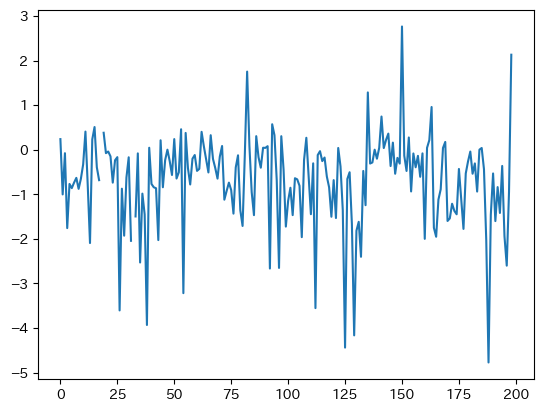

In [50]:
#最後のBMI変動値でグラフ化
plt.plot((list(user["result_bmi"])))

In [51]:
#0以下は落とす
drop_lis_result_bmi=list(user[user["result_bmi"] >= 0]["uid"])

In [52]:
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @drop_lis_result_bmi")
user=user.query("uid not in @drop_lis_result_bmi")
que=que.query("uid not in @drop_lis_result_bmi")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {13312,199,199,2}
{body,body(uid),user,que} : {11064,155,155,2}


### 計測期間で絞る

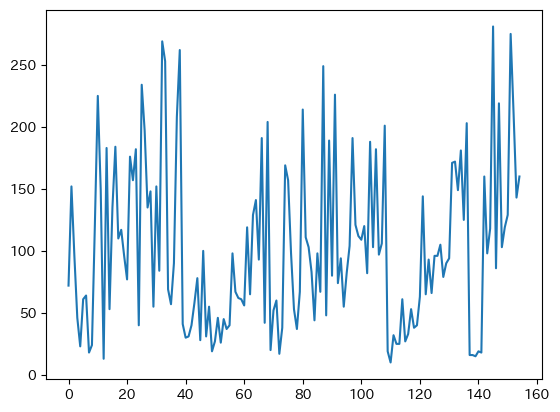

In [53]:
#計測期間で可視化
plt.plot(list(user["total_term"]))

In [54]:
#計測機関の度数分布
Frequency_Distribution(list(user["total_term"]),5)

階級値  度数  累積度数      相対度数    累積相対度数
階級                                             
0以上5未満        2.5   0     0  0.000000  0.000000
5以上10未満       7.5   0     0  0.000000  0.000000
10以上15未満     12.5   2     2  0.012903  0.012903
15以上20未満     17.5   9    11  0.058065  0.070968
20以上25未満     22.5   3    14  0.019355  0.090323
25以上30未満     27.5   6    20  0.038710  0.129032
30以上35未満     32.5   5    25  0.032258  0.161290
35以上40未満     37.5   4    29  0.025806  0.187097
40以上45未満     42.5   7    36  0.045161  0.232258
45以上50未満     47.5   4    40  0.025806  0.258065
50以上55未満     52.5   4    44  0.025806  0.283871
55以上60未満     57.5   6    50  0.038710  0.322581
60以上65未満     62.5   7    57  0.045161  0.367742
65以上70未満     67.5   7    64  0.045161  0.412903
70以上75未満     72.5   2    66  0.012903  0.425806
75以上80未満     77.5   3    69  0.019355  0.445161
80以上85未満     82.5   5    74  0.032258  0.477419
85以上90未満     87.5   1    75  0.006452  0.483871
90以上95未満     92.5   6    81  0.038710  0.522581
95以上100未満    97.5   9    90  0.058065  0.580645
100以上105未満  102.5   5    95  0.032258  0.612903
105以上110未満  107.5   3    98  0.019355  0.632258
110以上115未満  112.5   3   101  0.019355  0.651613
115以上120未満  117.5   4   105  0.025806  0.677419
120以上125未満  122.5   3   108  0.019355  0.696774
125以上130未満  127.5   3   111  0.019355  0.716129
130以上135未満  132.5   0   111  0.000000  0.716129
135以上140未満  137.5   2   113  0.012903  0.729032
140以上145未満  142.5   3   116  0.019355  0.748387
145以上150未満  147.5   3   119  0.019355  0.767742
150以上155未満  152.5   2   121  0.012903  0.780645
155以上160未満  157.5   2   123  0.012903  0.793548
160以上165未満  162.5   2   125  0.012903  0.806452
165以上170未満  167.5   1   126  0.006452  0.812903
170以上175未満  172.5   2   128  0.012903  0.825806
175以上180未満  177.5   1   129  0.006452  0.832258
180以上185未満  182.5   5   134  0.032258  0.864516
185以上190未満  187.5   2   136  0.012903  0.877419
190以上195未満  192.5   2   138  0.012903  0.890323
195以上200未満  197.5   1   139  0.006452  0.896774
200以上205未満  202.5   3   142  0.019355  0.916129
205以上210未満  207.5   1   143  0.006452  0.922581
210以上215未満  212.5   2   145  0.012903  0.935484
215以上220未満  217.5   1   146  0.006452  0.941935
220以上225未満  222.5   0   146  0.000000  0.941935
225以上230未満  227.5   2   148  0.012903  0.954839
230以上235未満  232.5   1   149  0.006452  0.961290
235以上240未満  237.5   0   149  0.000000  0.961290
240以上245未満  242.5   0   149  0.000000  0.961290
245以上250未満  247.5   1   150  0.006452  0.967742
250以上255未満  252.5   1   151  0.006452  0.974194
255以上260未満  257.5   0   151  0.000000  0.974194
260以上265未満  262.5   1   152  0.006452  0.980645
265以上270未満  267.5   1   153  0.006452  0.987097
270以上275未満  272.5   0   153  0.000000  0.987097
275以上280未満  277.5   1   154  0.006452  0.993548
280以上285未満  282.5   1   155  0.006452  1.000000

In [55]:
#90より少ない人を落とす
drop_lis_term=list(user[user["total_term"] < 90]["uid"])

In [56]:
drop_lis_term

['KIgTw7T6jA',
 'kOYjRsgKlS',
 'fiE6MEeWvh',
 'Az20NzH7PV',
 'BZRT3iFVGL',
 '6CQlyETEpR',
 'ixQsQ5tRMd',
 'xXCGmiHSGS',
 'onoxIfqqLU',
 'AUVt0Rerfu',
 '3Y3lrTQc7G',
 'wWNtygkXEs',
 'MgEJBKE4yf',
 'FwTqZXIUs9',
 'hgc13a28Sw',
 'zxTIxp5z8T',
 'nkfJMFRvc2',
 'pmRMFoJte4',
 '0zDtFgPsxp',
 'TQQ9MSJyiP',
 '8vAZUGiZ69',
 'mkmN4ELfrR',
 'RIElbrL6U5',
 '8ry64916ZC',
 'JdJE2APAkZ',
 'VbWv4rYUGg',
 'z0mjpZI5sI',
 'sVTyagGF7r',
 'bOsc7ABlEY',
 'ANnr92lceb',
 'wRfM7PJnKc',
 'MB0bWBpoH6',
 'jIgIsYTDEZ',
 'GWREsfRp3g',
 'plBGr0OfbA',
 'auVpRtdJCf',
 'dKxS5qMfPI',
 'hGuKjLQMBa',
 'ANOsnwIc9Y',
 '1BYKjkT1uj',
 'OAqgzBeqzd',
 'J7yt7f4cYD',
 'XXzII3GBYv',
 'o5o1oFZ1he',
 '6aiQqgF4yG',
 'MOo8Tv34Zg',
 'S48ppFatpS',
 'W5L03OI4Rs',
 'MwveMr52po',
 'hpUTdUcXGf',
 'sjzXzU3q9w',
 'mBT8DgYTjh',
 'CRriDCHdQt',
 'TSCQXat7Py',
 'uPWWng1CbX',
 'HSPLFLAjwD',
 'WV5K3iY9xM',
 'LH7meYCCo5',
 'F51k3LP5xM',
 'bc8pjsxHcT',
 'fhBJBlDDav',
 'mcsCURPYnq',
 'XhkBrdRm7L',
 'HENPUkBNDr',
 '4BVNpeKNIO',
 'Li1FXPPAjo',
 '94obIIBf

In [57]:
#データを落とす
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")
body=body.query("uid not in @drop_lis_term")
user=user.query("uid not in @drop_lis_term")
que=que.query("uid not in @drop_lis_term")
print("{body,body(uid),user,que} : {"+str(len(body))+","+str(len(body.groupby("uid").count()))+","+str(len(user))+","+str(len(que.shape))+"}")

{body,body(uid),user,que} : {11064,155,155,2}
{body,body(uid),user,que} : {8258,80,80,2}


In [58]:
#データを90日に揃える（91日以上を削る）
body=body[body["term"]<91]
body

index         uid  weight  muscle  bodyFatPercentage  height  \
0          0  08NygOCesb    60.7    35.1               24.2   158.0   
1          1  08NygOCesb    60.1    35.3               23.9   158.0   
2          2  08NygOCesb    60.1    35.4               24.1   158.0   
3          3  08NygOCesb    59.9    35.6               23.7   158.0   
4          4  08NygOCesb    59.6    35.7               23.6   158.0   
...      ...         ...     ...     ...                ...     ...   
13303     67  zz8rqs5g0x    57.7    42.9               21.4   172.0   
13304     68  zz8rqs5g0x    57.8    43.5               20.6   172.0   
13305     69  zz8rqs5g0x    57.3    42.3               22.1   172.0   
13306     70  zz8rqs5g0x    56.9    41.8               22.6   172.0   
13307     71  zz8rqs5g0x    57.1    42.1               22.4   172.0   

            date        bmi  term   bmi_dif  weight_dif  
0     1900-10-31  24.315014   0.0  0.000000         0.0  
1     1900-11-01  24.074668   1.0 -0.240346        -0.6  
2     1900-11-02  24.074668   2.0 -0.240346        -0.6  
3     1900-11-03  23.994552   3.0 -0.320461        -0.8  
4     1900-11-04  23.874379   4.0 -0.440635        -1.1  
...          ...        ...   ...       ...         ...  
13303 1900-08-17  19.503786  85.0 -0.845051        -2.5  
13304 1900-08-18  19.537588  86.0 -0.811249        -2.4  
13305 1900-08-20  19.368578  88.0 -0.980260        -2.9  
13306 1900-08-21  19.233369  89.0 -1.115468        -3.3  
13307 1900-08-22  19.300973  90.0 -1.047864        -3.1  

[5314 rows x 11 columns]

## 18項目に分類する

In [59]:
#まずは男女で分ける
user.groupby("sex").count()

uid  userType  age  height  initial_weight  initial_bmi  result_bmi  \
sex                                                                        
女性    75        75   75      75              75           75          74   
男性     5         5    5       5               5            5           5   

     total_term  cases  
sex                     
女性           75     75  
男性            5      5

In [60]:
#年齢を~34,35~50,51~に分類
cut_age=pd.cut(user["age"],bins=[-1,34,49,100],labels=["young","adult","old"])
cut_age

2      adult
3        old
10       old
12     adult
13     young
       ...  
193      old
194    adult
195    young
196      old
197    adult
Name: age, Length: 80, dtype: category
Categories (3, object): ['young' < 'adult' < 'old']

In [61]:
user["age_class"]=cut_age
user

uid userType  age sex  height  initial_weight  initial_bmi  \
2    3Qypwz2SXx    承認ー結果   45  女性   159.0            84.7    33.503422   
3    7rIqiGndLX    承認ー結果   55  女性   154.5            59.7    25.010211   
10   U5PAfq4jAk    承認ー結果   55  女性   156.0            69.8    28.681788   
12   ryK7IfFWX2  根拠ープロセス   40  女性   163.0            64.4    24.238775   
13   4PNOGh72Ol    結論ー結果   29  女性   163.5            61.1    22.856288   
..          ...      ...  ...  ..     ...             ...          ...   
193  Yc9ZjbpUKK    結論ー結果   52  女性   157.0            64.0    25.964542   
194  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799   
195  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782   
196  OeGWdyTCo4    根拠ー結果   55  女性   155.6            65.7    27.136022   
197  QSTOOBiwiY    根拠ー結果   47  女性   163.5            68.6    25.661888   

     result_bmi  total_term  cases age_class  
2     -0.079111         152     35     adult  
3     -1.759512          96     31       old  
10    -0.328731         121    104       old  
12    -0.790395         225     12     adult  
13    -2.094848         149    135     young  
..          ...         ...    ...       ...  
193   -1.419936         129    108       old  
194   -0.365126         275    246     adult  
195   -1.939619         211    134     young  
196   -2.602084         143    143       old  
197   -0.935200         160    152     adult  

[80 rows x 11 columns]

In [62]:
#性別と年齢で分類した結果のデータ数
user.groupby(["sex","age_class"]).count()

uid  userType  age  height  initial_weight  initial_bmi  \
sex age_class                                                            
女性  young       12        12   12      12              12           12   
    adult       37        37   37      37              37           37   
    old         26        26   26      26              26           26   
男性  young        0         0    0       0               0            0   
    adult        2         2    2       2               2            2   
    old          3         3    3       3               3            3   

               result_bmi  total_term  cases  
sex age_class                                 
女性  young              12          12     12  
    adult              36          37     37  
    old                26          26     26  
男性  young               0           0      0  
    adult               2           2      2  
    old                 3           3      3

In [63]:
#次にBMIで分類
cut_bmi=pd.cut(user["initial_bmi"],bins=[18.5,22,25,100],labels=["やせ型","理想","肥満"],right=False)
cut_bmi

2       肥満
3       肥満
10      肥満
12      理想
13      理想
      ... 
193     肥満
194    やせ型
195     理想
196     肥満
197     肥満
Name: initial_bmi, Length: 80, dtype: category
Categories (3, object): ['やせ型' < '理想' < '肥満']

In [64]:
user["bmi_class"]=cut_bmi
user

uid userType  age sex  height  initial_weight  initial_bmi  \
2    3Qypwz2SXx    承認ー結果   45  女性   159.0            84.7    33.503422   
3    7rIqiGndLX    承認ー結果   55  女性   154.5            59.7    25.010211   
10   U5PAfq4jAk    承認ー結果   55  女性   156.0            69.8    28.681788   
12   ryK7IfFWX2  根拠ープロセス   40  女性   163.0            64.4    24.238775   
13   4PNOGh72Ol    結論ー結果   29  女性   163.5            61.1    22.856288   
..          ...      ...  ...  ..     ...             ...          ...   
193  Yc9ZjbpUKK    結論ー結果   52  女性   157.0            64.0    25.964542   
194  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799   
195  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782   
196  OeGWdyTCo4    根拠ー結果   55  女性   155.6            65.7    27.136022   
197  QSTOOBiwiY    根拠ー結果   47  女性   163.5            68.6    25.661888   

     result_bmi  total_term  cases age_class bmi_class  
2     -0.079111         152     35     adult        肥満  
3     -1.759512          96     31       old        肥満  
10    -0.328731         121    104       old        肥満  
12    -0.790395         225     12     adult        理想  
13    -2.094848         149    135     young        理想  
..          ...         ...    ...       ...       ...  
193   -1.419936         129    108       old        肥満  
194   -0.365126         275    246     adult       やせ型  
195   -1.939619         211    134     young        理想  
196   -2.602084         143    143       old        肥満  
197   -0.935200         160    152     adult        肥満  

[80 rows x 12 columns]

In [65]:
user.groupby(["sex","age_class","bmi_class"]).count()

uid  userType  age  height  initial_weight  \
sex age_class bmi_class                                               
女性  young     やせ型          0         0    0       0               0   
              理想           7         7    7       7               7   
              肥満           5         5    5       5               5   
    adult     やせ型          8         8    8       8               8   
              理想          10        10   10      10              10   
              肥満          19        19   19      19              19   
    old       やせ型          4         4    4       4               4   
              理想          11        11   11      11              11   
              肥満          11        11   11      11              11   
男性  young     やせ型          0         0    0       0               0   
              理想           0         0    0       0               0   
              肥満           0         0    0       0               0   
    adult     やせ型          0         0    0       0               0   
              理想           0         0    0       0               0   
              肥満           2         2    2       2               2   
    old       やせ型          0         0    0       0               0   
              理想           1         1    1       1               1   
              肥満           2         2    2       2               2   

                         initial_bmi  result_bmi  total_term  cases  
sex age_class bmi_class                                              
女性  young     やせ型                  0           0           0      0  
              理想                   7           7           7      7  
              肥満                   5           5           5      5  
    adult     やせ型                  8           8           8      8  
              理想                  10           9          10     10  
              肥満                  19          19          19     19  
    old       やせ型                  4           4           4      4  
              理想                  11          11          11     11  
              肥満                  11          11          11     11  
男性  young     やせ型                  0           0           0      0  
              理想                   0           0           0      0  
              肥満                   0           0           0      0  
    adult     やせ型                  0           0           0      0  
              理想                   0           0           0      0  
              肥満                   2           2           2      2  
    old       やせ型                  0           0           0      0  
              理想                   1           1           1      1  
              肥満                   2           2           2      2

In [66]:
#区分名をuserに追加
results=[]
for (sex,age,bmi),group in user.groupby(["sex","age_class","bmi_class"]):
    print((sex,age,bmi))
    group["class"]=sex+"_"+age+"_"+bmi
    display(group)
    print("\n")
    results.append(group)#ユーザーごとのdfをリスト化
    
user=pd.concat(results)#ユーザーごとのdfと1つに統合

('女性', 'young', '理想')


uid userType  age sex  height  initial_weight  initial_bmi  \
13   4PNOGh72Ol    結論ー結果   29  女性   163.5            61.1    22.856288   
23   h6z89YKYtQ    承認ー結果   31  女性   156.0            54.2    22.271532   
57   g3EzPYiyfo  着実ープロセス   19  女性   164.0            62.5    23.237656   
131  HzHguFJCOa  承認ープロセス   34  女性   153.2            56.1    23.902610   
134  sXK4WMxnWh  着実ープロセス   34  女性   170.0            71.3    24.671280   
165  MjczyDFmDX    承認ー結果   33  女性   160.0            63.2    24.687500   
195  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782   

     result_bmi  total_term  cases age_class bmi_class        class  
13    -2.094848         149    135     young        理想  女性_young_理想  
23    -0.739645         117    111     young        理想  女性_young_理想  
57    -0.780785         100     14     young        理想  女性_young_理想  
131   -1.619072         182     96     young        理想  女性_young_理想  
134   -1.245675         201    115     young        理想  女性_young_理想  
165   -1.953125          96     96     young        理想  女性_young_理想  
195   -1.939619         211    134     young        理想  女性_young_理想



('女性', 'young', '肥満')


uid userType  age sex  height  initial_weight  initial_bmi  \
78   XSbAgRtIi2  着実ープロセス   20  女性   154.0            64.9    27.365492   
105  Ja62p9RjK2  承認ープロセス   29  女性   147.0            61.1    28.275256   
106  Z4Q2LFBiXJ    結論ー結果   29  女性   158.0            70.6    28.280724   
121  HWlckplRhl    承認ー結果   33  女性   163.5            90.9    34.003872   
174  ir9lHh6RhC  着実ープロセス   30  女性   164.0            70.1    26.063355   

     result_bmi  total_term  cases age_class bmi_class        class  
78    -0.126497         129     85     young        肥満  女性_young_肥満  
105   -0.809848         111     62     young        肥満  女性_young_肥満  
106   -1.962826         103    102     young        肥満  女性_young_肥満  
121   -1.533728         104     64     young        肥満  女性_young_肥満  
174   -1.450030         149    102     young        肥満  女性_young_肥満



('女性', 'adult', 'やせ型')


uid userType  age sex  height  initial_weight  initial_bmi  \
24   EDdRHJQpVq    承認ー結果   49  女性   159.0            51.8    20.489696   
30   VFWIYH7Kom    承認ー結果   38  女性   171.0            59.2    20.245546   
80   GocVMo5vGQ  着実ープロセス   44  女性   158.5            51.2    20.380340   
118  zz8rqs5g0x    承認ー結果   40  女性   172.0            60.2    20.348837   
159  VzvjAWk7RX    結論ー結果   39  女性   155.0            51.0    21.227888   
172  RtG07OaEy1    結論ー結果   39  女性   154.6            51.6    21.588910   
192  itUepJNFN5  承認ープロセス   48  女性   160.0            54.5    21.289062   
194  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799   

     result_bmi  total_term  cases age_class bmi_class         class  
24    -0.237332          96     37     adult       やせ型  女性_adult_やせ型  
30    -0.170993         234     87     adult       やせ型  女性_adult_やせ型  
80    -1.711630          93     93     adult       やせ型  女性_adult_やせ型  
118   -0.845051          94     76     adult       やせ型  女性_adult_やせ型  
159   -0.083247          93     61     adult       やせ型  女性_adult_やせ型  
172   -1.213330         171     91     adult       やせ型  女性_adult_やせ型  
192   -0.839844         119     94     adult       やせ型  女性_adult_やせ型  
194   -0.365126         275    246     adult       やせ型  女性_adult_やせ型



('女性', 'adult', '理想')


uid userType  age sex  height  initial_weight  initial_bmi  \
12   ryK7IfFWX2  根拠ープロセス   40  女性   163.0           64.40    24.238775   
20   h6D40AnZq0    承認ー結果   40  女性   160.0           61.00    23.828125   
21   cFF3hiaEqF    承認ー結果   47  女性   155.0           55.20    22.976067   
32   0tNvnJ3edM    承認ー結果   49  女性   167.5           62.85    22.401426   
33   d8QLuoEi7z  根拠ープロセス   44  女性   155.0           55.10    22.934443   
104  a6dODwzD8F    承認ー結果   36  女性   155.0           56.00    23.309053   
133  M0gkO8nNRt    根拠ー結果   38  女性   165.0           61.40    22.552801   
164  KZ0HBQqIR0  承認ープロセス   36  女性   153.0           54.00    23.068051   
170  8a23jrytwL    結論ー結果   49  女性   150.0           55.10    24.488889   
171  9gyXkj2OXc    承認ー結果   42  女性   157.0           55.40    22.475557   

     result_bmi  total_term  cases age_class bmi_class        class  
12    -0.790395         225     12     adult        理想  女性_adult_理想  
20    -0.078125         135     90     adult        理想  女性_adult_理想  
21    -0.041623         184     63     adult        理想  女性_adult_理想  
32          NaN         135    121     adult        理想  女性_adult_理想  
33    -1.498439         148    143     adult        理想  女性_adult_理想  
104   -0.665973         214    143     adult        理想  女性_adult_理想  
133   -0.477502         106    102     adult        理想  女性_adult_理想  
164   -1.751463          96     95     adult        理想  女性_adult_理想  
170   -1.600000          90     83     adult        理想  女性_adult_理想  
171   -1.541645          94     91     adult        理想  女性_adult_理想



('女性', 'adult', '肥満')


uid userType  age sex  height  initial_weight  initial_bmi  \
2    3Qypwz2SXx    承認ー結果   45  女性   159.0           84.70    33.503422   
26   xBkvAPcm0i    結論ー結果   42  女性   164.0           70.30    26.137716   
31   NxLRPsRl4j  根拠ープロセス   40  女性   161.0           68.10    26.272135   
35   MdUJkaMB5J    承認ー結果   47  女性   159.0           76.00    30.062102   
38   P3OzDikUGr  着実ープロセス   47  女性   155.0          101.40    42.206035   
42   CBpToRWqDP  承認ープロセス   39  女性   152.0           63.40    27.441136   
43   xGYj70zTrk  承認ープロセス   49  女性   157.0           64.00    25.964542   
45   1VH3NjyLJb    承認ー結果   36  女性   154.0           59.80    25.215045   
76   GD3RFn3c0P  根拠ープロセス   40  女性   149.8           70.47    31.403687   
98   rWk94vQExP    承認ー結果   44  女性   157.0           65.60    26.613656   
112  v78EALz6s2    結論ー結果   43  女性   160.0           64.00    25.000000   
116  ktpnClrRgZ    承認ー結果   46  女性   168.5           73.00    25.711242   
129  i7vygCsJJO    承認ー結果   35  女性   161.0          120.00    46.294510   
130  JsyCxly5ME    結論ー結果   37  女性   162.5           67.50    25.562130   
175  5dGq0ySt3B  根拠ープロセス   43  女性   152.0           58.50    25.320291   
176  xaPaz4ggkD    結論ー結果   42  女性   160.0           70.00    27.343750   
183  cz0llJii2l    根拠ー結果   43  女性   153.0           60.20    25.716605   
191  4bBuK01UJS    承認ー結果   46  女性   158.0           62.80    25.156225   
197  QSTOOBiwiY    根拠ー結果   47  女性   163.5           68.60    25.661888   

     result_bmi  total_term  cases age_class bmi_class        class  
2     -0.079111         152     35     adult        肥満  女性_adult_肥満  
26    -3.606484         176    115     adult        肥満  女性_adult_肥満  
31    -2.044674         197     78     adult        肥満  女性_adult_肥満  
35    -2.531545         152     52     adult        肥満  女性_adult_肥満  
38    -3.933403         253    243     adult        肥満  女性_adult_肥満  
42    -0.865651          90     47     adult        肥満  女性_adult_肥満  
43    -2.028480         208    133     adult        肥満  女性_adult_肥満  
45    -0.843313         262     33     adult        肥満  女性_adult_肥満  
76    -1.434935         119     59     adult        肥満  女性_adult_肥満  
98    -0.446266         169     22     adult        肥満  女性_adult_肥満  
112   -3.554688         249     47     adult        肥満  女性_adult_肥満  
116   -0.176104         226     52     adult        肥満  女性_adult_肥満  
129   -4.166506         188    182     adult        肥満  女性_adult_肥満  
130   -1.817751         103     97     adult        肥満  女性_adult_肥満  
175   -0.432825         181    156     adult        肥満  女性_adult_肥満  
176   -1.093750         125    121     adult        肥満  女性_adult_肥満  
183   -0.939809         160    145     adult        肥満  女性_adult_肥満  
191   -1.602307         103     92     adult        肥満  女性_adult_肥満  
197   -0.935200         160    152     adult        肥満  女性_adult_肥満



('女性', 'old', 'やせ型')


uid userType  age sex  height  initial_weight  initial_bmi  \
22   Z0kaVh0TWU    承認ー結果   57  女性   163.0            58.1    21.867590   
81   9QMSuKRsq3    承認ー結果   54  女性   151.5            45.8    19.954471   
126  A8ieZNJ3ac  承認ープロセス   51  女性   156.0            51.1    20.997699   
173  WAPyWIuZOL  承認ープロセス   55  女性   155.0            52.0    21.644121   

     result_bmi  total_term  cases age_class bmi_class       class  
22    -0.150551         110     35       old       やせ型  女性_old_やせ型  
81    -0.087137         191    132       old       やせ型  女性_old_やせ型  
126   -0.657462         109     93       old       やせ型  女性_old_やせ型  
173   -1.373569         172     94       old       やせ型  女性_old_やせ型



('女性', 'old', '理想')


uid userType  age sex  height  initial_weight  initial_bmi  \
17   YvQ1ekh6sD    結論ー結果   65  女性   171.0           67.40    23.049827   
37   XlaLDT8fSC    結論ー結果   65  女性   164.0           66.85    24.854997   
70   Y7A3Wg45KS  根拠ープロセス   54  女性   160.0           57.50    22.460938   
79   J4jthpzN7t    結論ー結果   52  女性   165.0           62.80    23.067034   
99   cTPkCVqGoh  根拠ープロセス   60  女性   156.0           55.60    22.846811   
110  Y5qFDAmRRA  承認ープロセス   56  女性   162.0           62.00    23.624447   
114  XSmWaXjIOo  根拠ープロセス   52  女性   172.0           70.20    23.729043   
124  xqAQW0MKqe    承認ー結果   56  女性   147.5           53.95    24.797472   
127  6qPAkMhj97    結論ー結果   66  女性   154.0           59.00    24.877720   
132  08NygOCesb    承認ー結果   53  女性   158.0           60.70    24.315014   
186  UCT1z97HbL  着実ープロセス   59  女性   151.0           53.30    23.376168   

     result_bmi  total_term  cases age_class bmi_class      class  
17    -0.683971         183    132       old        理想  女性_old_理想  
37    -1.450030         269    253       old        理想  女性_old_理想  
70    -0.156250          98     44       old        理想  女性_old_理想  
79    -1.359045         141    131       old        理想  女性_old_理想  
99    -1.725838         157    129       old        理想  女性_old_理想  
110   -1.447950          98     86       old        理想  女性_old_理想  
114   -0.033802         189     80       old        理想  女性_old_理想  
124   -1.355932         121    122       old        理想  女性_old_理想  
127   -0.505988         120     78       old        理想  女性_old_理想  
132   -2.403461          97     98       old        理想  女性_old_理想  
186   -0.438577          98     95       old        理想  女性_old_理想



('女性', 'old', '肥満')


uid userType  age sex  height  initial_weight  initial_bmi  \
3    7rIqiGndLX    承認ー結果   55  女性   154.5           59.70    25.010211   
10   U5PAfq4jAk    承認ー結果   55  女性   156.0           69.80    28.681788   
28   EFC6XZss9U    承認ー結果   61  女性   151.0           63.80    27.981229   
85   TzsZskDZUt    承認ー結果   54  女性   165.0           80.00    29.384757   
100  y5qKHxmMUH  着実ープロセス   56  女性   156.0           73.00    29.996713   
157  y7UdCj11TL    承認ー結果   51  女性   147.0           60.80    28.136425   
177  C6Tltyng6z    承認ー結果   55  女性   150.0           74.50    33.111111   
187  MdOwBOx3nM    承認ー結果   63  女性   150.5           63.20    27.902562   
188  yx4x7z17f6  根拠ープロセス   54  女性   149.0           60.35    27.183460   
193  Yc9ZjbpUKK    結論ー結果   52  女性   157.0           64.00    25.964542   
196  OeGWdyTCo4    根拠ー結果   55  女性   155.6           65.70    27.136022   

     result_bmi  total_term  cases age_class bmi_class      class  
3     -1.759512          96     31       old        肥満  女性_old_肥満  
10    -0.328731         121    104       old        肥満  女性_old_肥満  
28    -1.929740         182    109       old        肥満  女性_old_肥満  
85    -1.469238         204    190       old        肥満  女性_old_肥満  
100   -1.150559          98     50       old        肥満  女性_old_肥満  
157   -0.138831         144     70       old        肥満  女性_old_肥満  
177   -1.777778         203    124       old        肥満  女性_old_肥満  
187   -2.030883         118    113       old        肥満  女性_old_肥満  
188   -4.774560         281    275       old        肥満  女性_old_肥満  
193   -1.419936         129    108       old        肥満  女性_old_肥満  
196   -2.602084         143    143       old        肥満  女性_old_肥満



('男性', 'adult', '肥満')


uid userType  age sex  height  initial_weight  initial_bmi  \
125  te0dRjMnE6    結論ー結果   45  男性   175.0            96.9    31.640816   
166  iQ5zi61y05    承認ー結果   45  男性   169.0            76.0    26.609713   

     result_bmi  total_term  cases age_class bmi_class        class  
125   -4.440816         112     73     adult        肥満  男性_adult_肥満  
166   -1.120409         105     76     adult        肥満  男性_adult_肥満



('男性', 'old', '理想')


uid userType  age sex  height  initial_weight  initial_bmi  \
123  GcnFSa8JmB    承認ー結果   61  男性   179.0            76.2    23.782029   

     result_bmi  total_term  cases age_class bmi_class      class  
123    -0.37452         191    145       old        理想  男性_old_理想



('男性', 'old', '肥満')


uid userType  age sex  height  initial_weight  initial_bmi  \
27   hYWmbFUoWN  承認ープロセス   58  男性   169.0            89.0    31.161374   
190  dSLku0XJy0    根拠ー結果   52  男性   162.0            69.7    26.558451   

     result_bmi  total_term  cases age_class bmi_class      class  
27    -0.875319         157    128       old        肥満  男性_old_肥満  
190   -0.533455         219    212       old        肥満  男性_old_肥満

## 可視化

In [67]:
#区分ごとのuidを辞書化
dic={}
for i,group in user.groupby("class"):
    dic[i]=list(group["uid"])
dic

{'女性_adult_やせ型': ['EDdRHJQpVq',
  'VFWIYH7Kom',
  'GocVMo5vGQ',
  'zz8rqs5g0x',
  'VzvjAWk7RX',
  'RtG07OaEy1',
  'itUepJNFN5',
  'xKZw6RYrHF'],
 '女性_adult_理想': ['ryK7IfFWX2',
  'h6D40AnZq0',
  'cFF3hiaEqF',
  '0tNvnJ3edM',
  'd8QLuoEi7z',
  'a6dODwzD8F',
  'M0gkO8nNRt',
  'KZ0HBQqIR0',
  '8a23jrytwL',
  '9gyXkj2OXc'],
 '女性_adult_肥満': ['3Qypwz2SXx',
  'xBkvAPcm0i',
  'NxLRPsRl4j',
  'MdUJkaMB5J',
  'P3OzDikUGr',
  'CBpToRWqDP',
  'xGYj70zTrk',
  '1VH3NjyLJb',
  'GD3RFn3c0P',
  'rWk94vQExP',
  'v78EALz6s2',
  'ktpnClrRgZ',
  'i7vygCsJJO',
  'JsyCxly5ME',
  '5dGq0ySt3B',
  'xaPaz4ggkD',
  'cz0llJii2l',
  '4bBuK01UJS',
  'QSTOOBiwiY'],
 '女性_old_やせ型': ['Z0kaVh0TWU', '9QMSuKRsq3', 'A8ieZNJ3ac', 'WAPyWIuZOL'],
 '女性_old_理想': ['YvQ1ekh6sD',
  'XlaLDT8fSC',
  'Y7A3Wg45KS',
  'J4jthpzN7t',
  'cTPkCVqGoh',
  'Y5qFDAmRRA',
  'XSmWaXjIOo',
  'xqAQW0MKqe',
  '6qPAkMhj97',
  '08NygOCesb',
  'UCT1z97HbL'],
 '女性_old_肥満': ['7rIqiGndLX',
  'U5PAfq4jAk',
  'EFC6XZss9U',
  'TzsZskDZUt',
  'y5qKHxmMUH',
  '

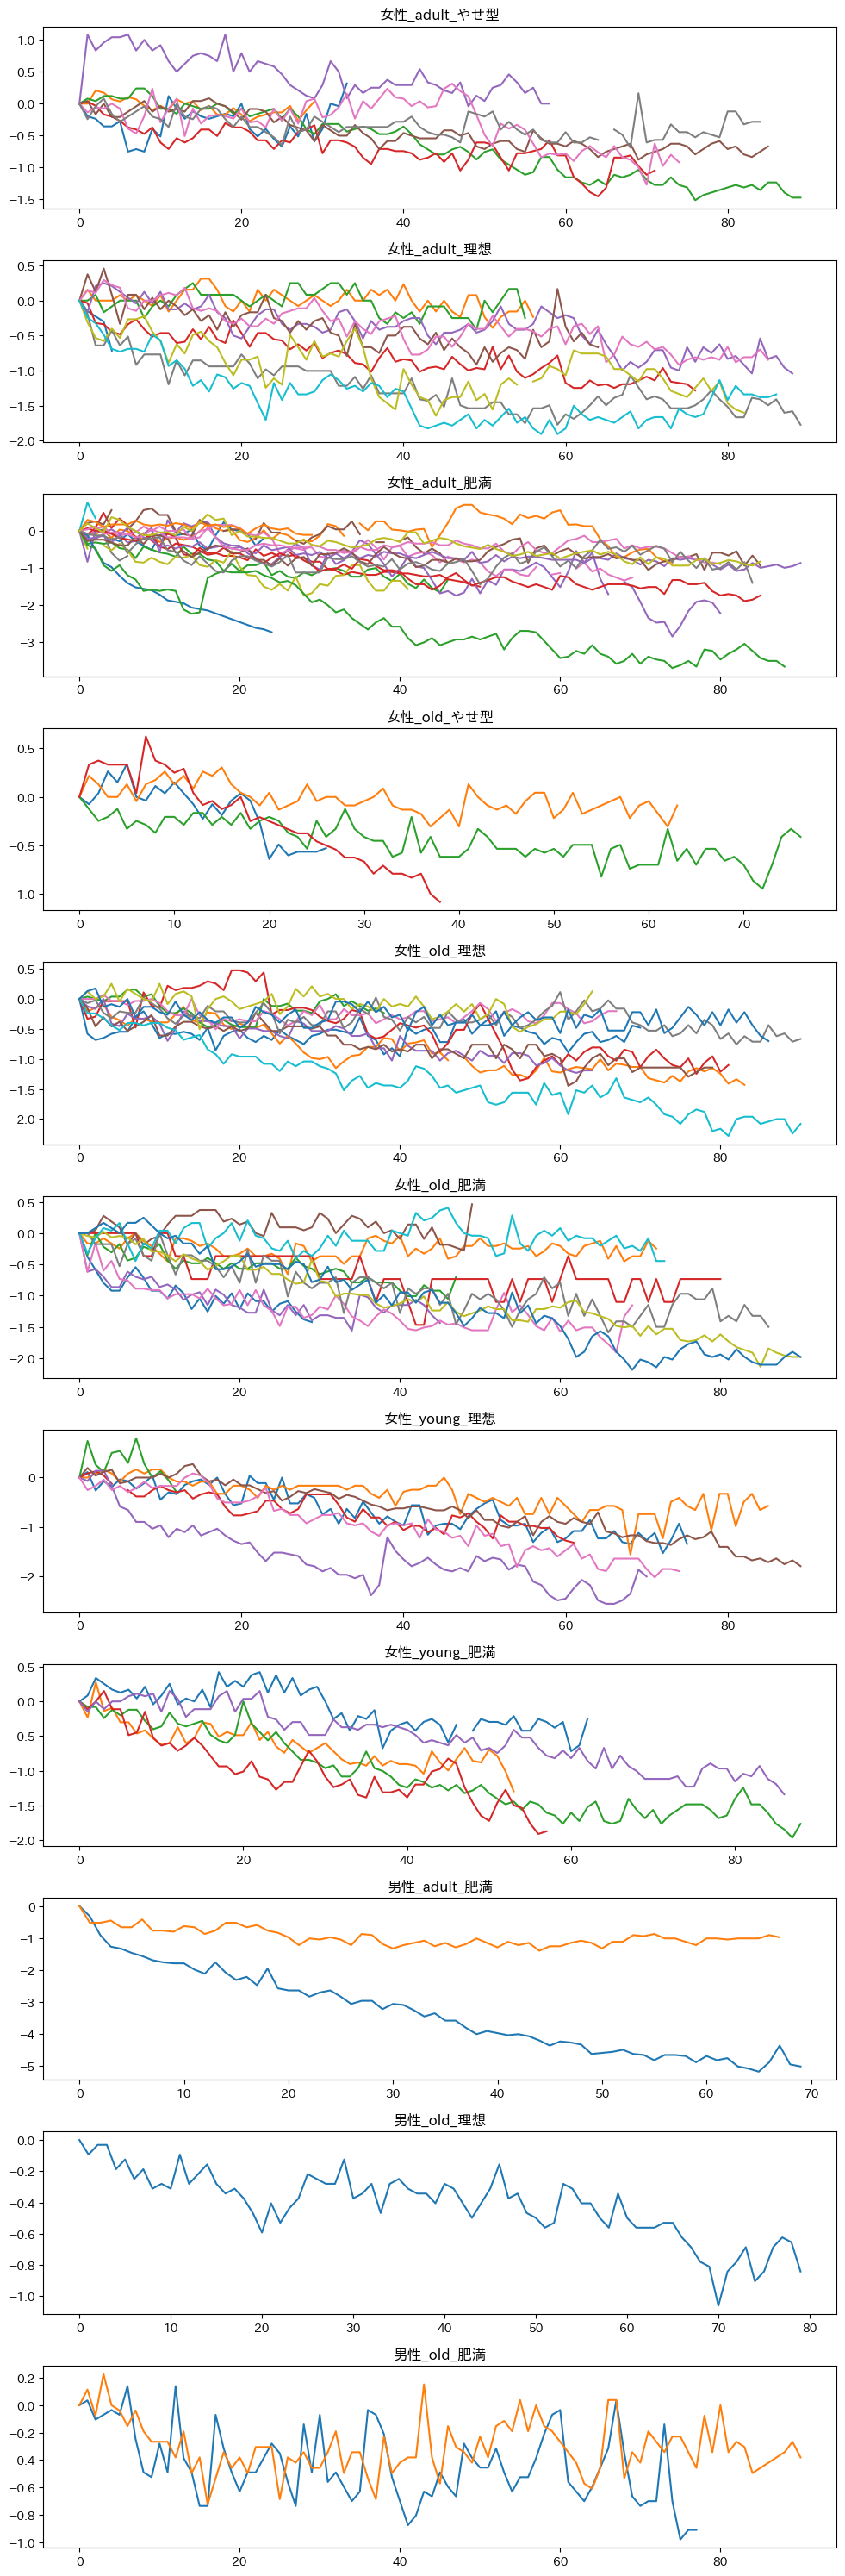

In [68]:
#区分ごとのユーザの推移を可視化
fig, axes = plt.subplots(11,1,figsize=(10,30))
i=0
for k,v in dic.items():
    for v in v:
        pl=body.query('uid==@v')
        axes[i].plot((list(pl["bmi_dif"])))
    axes[i].set_title(k)
    i+=1    
plt.tight_layout()
#plt.savefig("plot.jpg")
plt.show()

## 目標モデルデータ作成

In [69]:
#必要なデータだけ抜き出す
bmi_df=body[["index","uid","bmi_dif","term"]]
bmi_df

index         uid   bmi_dif  term
0          0  08NygOCesb  0.000000   0.0
1          1  08NygOCesb -0.240346   1.0
2          2  08NygOCesb -0.240346   2.0
3          3  08NygOCesb -0.320461   3.0
4          4  08NygOCesb -0.440635   4.0
...      ...         ...       ...   ...
13303     67  zz8rqs5g0x -0.845051  85.0
13304     68  zz8rqs5g0x -0.811249  86.0
13305     69  zz8rqs5g0x -0.980260  88.0
13306     70  zz8rqs5g0x -1.115468  89.0
13307     71  zz8rqs5g0x -1.047864  90.0

[5314 rows x 4 columns]

In [70]:
#空のdfを作る
keys, terms = np.meshgrid(list(user["uid"]),[i for i in range(91)])
uid_term_df = pd.DataFrame({"uid": flatten(keys),"term": flatten(terms)})
uid_term_df

uid  term
0     4PNOGh72Ol     0
1     h6z89YKYtQ     0
2     g3EzPYiyfo     0
3     HzHguFJCOa     0
4     sXK4WMxnWh     0
...          ...   ...
7275  te0dRjMnE6    90
7276  iQ5zi61y05    90
7277  GcnFSa8JmB    90
7278  hYWmbFUoWN    90
7279  dSLku0XJy0    90

[7280 rows x 2 columns]

In [71]:
#空のdfと統合し、0～90日全てに対して列ができた
bmi_df=pd.merge(uid_term_df,bmi_df,how="left").sort_values(["uid","term"]).reset_index(drop=True)
bmi_df.head(500)

uid  term  index   bmi_dif
0    08NygOCesb     0    0.0  0.000000
1    08NygOCesb     1    1.0 -0.240346
2    08NygOCesb     2    2.0 -0.240346
3    08NygOCesb     3    3.0 -0.320461
4    08NygOCesb     4    4.0 -0.440635
..          ...   ...    ...       ...
495  4bBuK01UJS    40   36.0 -0.961384
496  4bBuK01UJS    41   37.0 -0.921327
497  4bBuK01UJS    42   38.0 -0.961384
498  4bBuK01UJS    43   39.0 -0.761096
499  4bBuK01UJS    44   40.0 -1.041500

[500 rows x 4 columns]

In [72]:
#欠損補完
lis=[]
for key,group in bmi_df.groupby("uid"):
    lis.append(group[["bmi_dif"]].interpolate())

bmi_df["bmi_dif"]=pd.concat(lis)

In [73]:
bmi_df

uid  term  index   bmi_dif
0     08NygOCesb     0    0.0  0.000000
1     08NygOCesb     1    1.0 -0.240346
2     08NygOCesb     2    2.0 -0.240346
3     08NygOCesb     3    3.0 -0.320461
4     08NygOCesb     4    4.0 -0.440635
...          ...   ...    ...       ...
7275  zz8rqs5g0x    86   68.0 -0.811249
7276  zz8rqs5g0x    87    NaN -0.895754
7277  zz8rqs5g0x    88   69.0 -0.980260
7278  zz8rqs5g0x    89   70.0 -1.115468
7279  zz8rqs5g0x    90   71.0 -1.047864

[7280 rows x 4 columns]

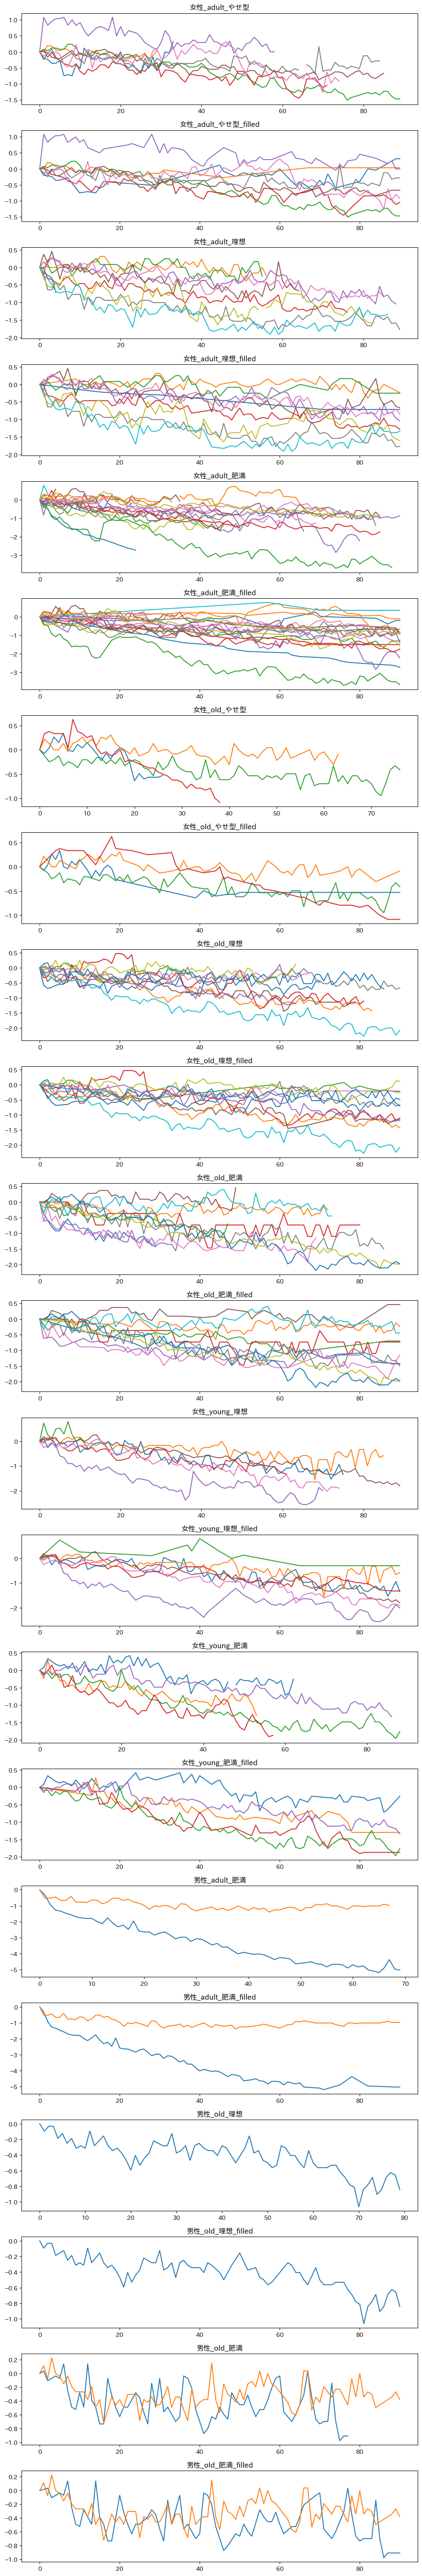

In [74]:
#0～90日を欠かさずすべてを補完したデータで再可視化、元データと比較
fig, axes = plt.subplots(22,1,figsize=(10,60))
i=0
for k,v in dic.items():
    for v in v:
        pl=body.query('uid==@v')
        pl2=bmi_df.query('uid==@v')
        axes[i].plot((list(pl["bmi_dif"])))
        axes[i+1].plot((list(pl2["bmi_dif"])))
    axes[i].set_title(k)
    axes[i+1].set_title(k+"_filled")
    i+=2    
plt.tight_layout()
#plt.savefig("plot.jpg")
plt.show()

In [75]:
#区分ごとのuidを取得
dic={}
for i,group in user.groupby("class"):
    dic[i]=list(group["uid"])
dic

{'女性_adult_やせ型': ['EDdRHJQpVq',
  'VFWIYH7Kom',
  'GocVMo5vGQ',
  'zz8rqs5g0x',
  'VzvjAWk7RX',
  'RtG07OaEy1',
  'itUepJNFN5',
  'xKZw6RYrHF'],
 '女性_adult_理想': ['ryK7IfFWX2',
  'h6D40AnZq0',
  'cFF3hiaEqF',
  '0tNvnJ3edM',
  'd8QLuoEi7z',
  'a6dODwzD8F',
  'M0gkO8nNRt',
  'KZ0HBQqIR0',
  '8a23jrytwL',
  '9gyXkj2OXc'],
 '女性_adult_肥満': ['3Qypwz2SXx',
  'xBkvAPcm0i',
  'NxLRPsRl4j',
  'MdUJkaMB5J',
  'P3OzDikUGr',
  'CBpToRWqDP',
  'xGYj70zTrk',
  '1VH3NjyLJb',
  'GD3RFn3c0P',
  'rWk94vQExP',
  'v78EALz6s2',
  'ktpnClrRgZ',
  'i7vygCsJJO',
  'JsyCxly5ME',
  '5dGq0ySt3B',
  'xaPaz4ggkD',
  'cz0llJii2l',
  '4bBuK01UJS',
  'QSTOOBiwiY'],
 '女性_old_やせ型': ['Z0kaVh0TWU', '9QMSuKRsq3', 'A8ieZNJ3ac', 'WAPyWIuZOL'],
 '女性_old_理想': ['YvQ1ekh6sD',
  'XlaLDT8fSC',
  'Y7A3Wg45KS',
  'J4jthpzN7t',
  'cTPkCVqGoh',
  'Y5qFDAmRRA',
  'XSmWaXjIOo',
  'xqAQW0MKqe',
  '6qPAkMhj97',
  '08NygOCesb',
  'UCT1z97HbL'],
 '女性_old_肥満': ['7rIqiGndLX',
  'U5PAfq4jAk',
  'EFC6XZss9U',
  'TzsZskDZUt',
  'y5qKHxmMUH',
  '

In [76]:
#確認
for i,group in user.groupby("class"):
    print(i)
    display(group)

女性_adult_やせ型


uid userType  age sex  height  initial_weight  initial_bmi  \
24   EDdRHJQpVq    承認ー結果   49  女性   159.0            51.8    20.489696   
30   VFWIYH7Kom    承認ー結果   38  女性   171.0            59.2    20.245546   
80   GocVMo5vGQ  着実ープロセス   44  女性   158.5            51.2    20.380340   
118  zz8rqs5g0x    承認ー結果   40  女性   172.0            60.2    20.348837   
159  VzvjAWk7RX    結論ー結果   39  女性   155.0            51.0    21.227888   
172  RtG07OaEy1    結論ー結果   39  女性   154.6            51.6    21.588910   
192  itUepJNFN5  承認ープロセス   48  女性   160.0            54.5    21.289062   
194  xKZw6RYrHF    結論ー結果   47  女性   157.0            50.0    20.284799   

     result_bmi  total_term  cases age_class bmi_class         class  
24    -0.237332          96     37     adult       やせ型  女性_adult_やせ型  
30    -0.170993         234     87     adult       やせ型  女性_adult_やせ型  
80    -1.711630          93     93     adult       やせ型  女性_adult_やせ型  
118   -0.845051          94     76     adult       やせ型  女性_adult_やせ型  
159   -0.083247          93     61     adult       やせ型  女性_adult_やせ型  
172   -1.213330         171     91     adult       やせ型  女性_adult_やせ型  
192   -0.839844         119     94     adult       やせ型  女性_adult_やせ型  
194   -0.365126         275    246     adult       やせ型  女性_adult_やせ型

女性_adult_理想


uid userType  age sex  height  initial_weight  initial_bmi  \
12   ryK7IfFWX2  根拠ープロセス   40  女性   163.0           64.40    24.238775   
20   h6D40AnZq0    承認ー結果   40  女性   160.0           61.00    23.828125   
21   cFF3hiaEqF    承認ー結果   47  女性   155.0           55.20    22.976067   
32   0tNvnJ3edM    承認ー結果   49  女性   167.5           62.85    22.401426   
33   d8QLuoEi7z  根拠ープロセス   44  女性   155.0           55.10    22.934443   
104  a6dODwzD8F    承認ー結果   36  女性   155.0           56.00    23.309053   
133  M0gkO8nNRt    根拠ー結果   38  女性   165.0           61.40    22.552801   
164  KZ0HBQqIR0  承認ープロセス   36  女性   153.0           54.00    23.068051   
170  8a23jrytwL    結論ー結果   49  女性   150.0           55.10    24.488889   
171  9gyXkj2OXc    承認ー結果   42  女性   157.0           55.40    22.475557   

     result_bmi  total_term  cases age_class bmi_class        class  
12    -0.790395         225     12     adult        理想  女性_adult_理想  
20    -0.078125         135     90     adult        理想  女性_adult_理想  
21    -0.041623         184     63     adult        理想  女性_adult_理想  
32          NaN         135    121     adult        理想  女性_adult_理想  
33    -1.498439         148    143     adult        理想  女性_adult_理想  
104   -0.665973         214    143     adult        理想  女性_adult_理想  
133   -0.477502         106    102     adult        理想  女性_adult_理想  
164   -1.751463          96     95     adult        理想  女性_adult_理想  
170   -1.600000          90     83     adult        理想  女性_adult_理想  
171   -1.541645          94     91     adult        理想  女性_adult_理想

女性_adult_肥満


uid userType  age sex  height  initial_weight  initial_bmi  \
2    3Qypwz2SXx    承認ー結果   45  女性   159.0           84.70    33.503422   
26   xBkvAPcm0i    結論ー結果   42  女性   164.0           70.30    26.137716   
31   NxLRPsRl4j  根拠ープロセス   40  女性   161.0           68.10    26.272135   
35   MdUJkaMB5J    承認ー結果   47  女性   159.0           76.00    30.062102   
38   P3OzDikUGr  着実ープロセス   47  女性   155.0          101.40    42.206035   
42   CBpToRWqDP  承認ープロセス   39  女性   152.0           63.40    27.441136   
43   xGYj70zTrk  承認ープロセス   49  女性   157.0           64.00    25.964542   
45   1VH3NjyLJb    承認ー結果   36  女性   154.0           59.80    25.215045   
76   GD3RFn3c0P  根拠ープロセス   40  女性   149.8           70.47    31.403687   
98   rWk94vQExP    承認ー結果   44  女性   157.0           65.60    26.613656   
112  v78EALz6s2    結論ー結果   43  女性   160.0           64.00    25.000000   
116  ktpnClrRgZ    承認ー結果   46  女性   168.5           73.00    25.711242   
129  i7vygCsJJO    承認ー結果   35  女性   161.0          120.00    46.294510   
130  JsyCxly5ME    結論ー結果   37  女性   162.5           67.50    25.562130   
175  5dGq0ySt3B  根拠ープロセス   43  女性   152.0           58.50    25.320291   
176  xaPaz4ggkD    結論ー結果   42  女性   160.0           70.00    27.343750   
183  cz0llJii2l    根拠ー結果   43  女性   153.0           60.20    25.716605   
191  4bBuK01UJS    承認ー結果   46  女性   158.0           62.80    25.156225   
197  QSTOOBiwiY    根拠ー結果   47  女性   163.5           68.60    25.661888   

     result_bmi  total_term  cases age_class bmi_class        class  
2     -0.079111         152     35     adult        肥満  女性_adult_肥満  
26    -3.606484         176    115     adult        肥満  女性_adult_肥満  
31    -2.044674         197     78     adult        肥満  女性_adult_肥満  
35    -2.531545         152     52     adult        肥満  女性_adult_肥満  
38    -3.933403         253    243     adult        肥満  女性_adult_肥満  
42    -0.865651          90     47     adult        肥満  女性_adult_肥満  
43    -2.028480         208    133     adult        肥満  女性_adult_肥満  
45    -0.843313         262     33     adult        肥満  女性_adult_肥満  
76    -1.434935         119     59     adult        肥満  女性_adult_肥満  
98    -0.446266         169     22     adult        肥満  女性_adult_肥満  
112   -3.554688         249     47     adult        肥満  女性_adult_肥満  
116   -0.176104         226     52     adult        肥満  女性_adult_肥満  
129   -4.166506         188    182     adult        肥満  女性_adult_肥満  
130   -1.817751         103     97     adult        肥満  女性_adult_肥満  
175   -0.432825         181    156     adult        肥満  女性_adult_肥満  
176   -1.093750         125    121     adult        肥満  女性_adult_肥満  
183   -0.939809         160    145     adult        肥満  女性_adult_肥満  
191   -1.602307         103     92     adult        肥満  女性_adult_肥満  
197   -0.935200         160    152     adult        肥満  女性_adult_肥満

女性_old_やせ型


uid userType  age sex  height  initial_weight  initial_bmi  \
22   Z0kaVh0TWU    承認ー結果   57  女性   163.0            58.1    21.867590   
81   9QMSuKRsq3    承認ー結果   54  女性   151.5            45.8    19.954471   
126  A8ieZNJ3ac  承認ープロセス   51  女性   156.0            51.1    20.997699   
173  WAPyWIuZOL  承認ープロセス   55  女性   155.0            52.0    21.644121   

     result_bmi  total_term  cases age_class bmi_class       class  
22    -0.150551         110     35       old       やせ型  女性_old_やせ型  
81    -0.087137         191    132       old       やせ型  女性_old_やせ型  
126   -0.657462         109     93       old       やせ型  女性_old_やせ型  
173   -1.373569         172     94       old       やせ型  女性_old_やせ型

女性_old_理想


uid userType  age sex  height  initial_weight  initial_bmi  \
17   YvQ1ekh6sD    結論ー結果   65  女性   171.0           67.40    23.049827   
37   XlaLDT8fSC    結論ー結果   65  女性   164.0           66.85    24.854997   
70   Y7A3Wg45KS  根拠ープロセス   54  女性   160.0           57.50    22.460938   
79   J4jthpzN7t    結論ー結果   52  女性   165.0           62.80    23.067034   
99   cTPkCVqGoh  根拠ープロセス   60  女性   156.0           55.60    22.846811   
110  Y5qFDAmRRA  承認ープロセス   56  女性   162.0           62.00    23.624447   
114  XSmWaXjIOo  根拠ープロセス   52  女性   172.0           70.20    23.729043   
124  xqAQW0MKqe    承認ー結果   56  女性   147.5           53.95    24.797472   
127  6qPAkMhj97    結論ー結果   66  女性   154.0           59.00    24.877720   
132  08NygOCesb    承認ー結果   53  女性   158.0           60.70    24.315014   
186  UCT1z97HbL  着実ープロセス   59  女性   151.0           53.30    23.376168   

     result_bmi  total_term  cases age_class bmi_class      class  
17    -0.683971         183    132       old        理想  女性_old_理想  
37    -1.450030         269    253       old        理想  女性_old_理想  
70    -0.156250          98     44       old        理想  女性_old_理想  
79    -1.359045         141    131       old        理想  女性_old_理想  
99    -1.725838         157    129       old        理想  女性_old_理想  
110   -1.447950          98     86       old        理想  女性_old_理想  
114   -0.033802         189     80       old        理想  女性_old_理想  
124   -1.355932         121    122       old        理想  女性_old_理想  
127   -0.505988         120     78       old        理想  女性_old_理想  
132   -2.403461          97     98       old        理想  女性_old_理想  
186   -0.438577          98     95       old        理想  女性_old_理想

女性_old_肥満


uid userType  age sex  height  initial_weight  initial_bmi  \
3    7rIqiGndLX    承認ー結果   55  女性   154.5           59.70    25.010211   
10   U5PAfq4jAk    承認ー結果   55  女性   156.0           69.80    28.681788   
28   EFC6XZss9U    承認ー結果   61  女性   151.0           63.80    27.981229   
85   TzsZskDZUt    承認ー結果   54  女性   165.0           80.00    29.384757   
100  y5qKHxmMUH  着実ープロセス   56  女性   156.0           73.00    29.996713   
157  y7UdCj11TL    承認ー結果   51  女性   147.0           60.80    28.136425   
177  C6Tltyng6z    承認ー結果   55  女性   150.0           74.50    33.111111   
187  MdOwBOx3nM    承認ー結果   63  女性   150.5           63.20    27.902562   
188  yx4x7z17f6  根拠ープロセス   54  女性   149.0           60.35    27.183460   
193  Yc9ZjbpUKK    結論ー結果   52  女性   157.0           64.00    25.964542   
196  OeGWdyTCo4    根拠ー結果   55  女性   155.6           65.70    27.136022   

     result_bmi  total_term  cases age_class bmi_class      class  
3     -1.759512          96     31       old        肥満  女性_old_肥満  
10    -0.328731         121    104       old        肥満  女性_old_肥満  
28    -1.929740         182    109       old        肥満  女性_old_肥満  
85    -1.469238         204    190       old        肥満  女性_old_肥満  
100   -1.150559          98     50       old        肥満  女性_old_肥満  
157   -0.138831         144     70       old        肥満  女性_old_肥満  
177   -1.777778         203    124       old        肥満  女性_old_肥満  
187   -2.030883         118    113       old        肥満  女性_old_肥満  
188   -4.774560         281    275       old        肥満  女性_old_肥満  
193   -1.419936         129    108       old        肥満  女性_old_肥満  
196   -2.602084         143    143       old        肥満  女性_old_肥満

女性_young_理想


uid userType  age sex  height  initial_weight  initial_bmi  \
13   4PNOGh72Ol    結論ー結果   29  女性   163.5            61.1    22.856288   
23   h6z89YKYtQ    承認ー結果   31  女性   156.0            54.2    22.271532   
57   g3EzPYiyfo  着実ープロセス   19  女性   164.0            62.5    23.237656   
131  HzHguFJCOa  承認ープロセス   34  女性   153.2            56.1    23.902610   
134  sXK4WMxnWh  着実ープロセス   34  女性   170.0            71.3    24.671280   
165  MjczyDFmDX    承認ー結果   33  女性   160.0            63.2    24.687500   
195  wb5n20qsQI    結論ー結果   25  女性   154.0            53.0    22.347782   

     result_bmi  total_term  cases age_class bmi_class        class  
13    -2.094848         149    135     young        理想  女性_young_理想  
23    -0.739645         117    111     young        理想  女性_young_理想  
57    -0.780785         100     14     young        理想  女性_young_理想  
131   -1.619072         182     96     young        理想  女性_young_理想  
134   -1.245675         201    115     young        理想  女性_young_理想  
165   -1.953125          96     96     young        理想  女性_young_理想  
195   -1.939619         211    134     young        理想  女性_young_理想

女性_young_肥満


uid userType  age sex  height  initial_weight  initial_bmi  \
78   XSbAgRtIi2  着実ープロセス   20  女性   154.0            64.9    27.365492   
105  Ja62p9RjK2  承認ープロセス   29  女性   147.0            61.1    28.275256   
106  Z4Q2LFBiXJ    結論ー結果   29  女性   158.0            70.6    28.280724   
121  HWlckplRhl    承認ー結果   33  女性   163.5            90.9    34.003872   
174  ir9lHh6RhC  着実ープロセス   30  女性   164.0            70.1    26.063355   

     result_bmi  total_term  cases age_class bmi_class        class  
78    -0.126497         129     85     young        肥満  女性_young_肥満  
105   -0.809848         111     62     young        肥満  女性_young_肥満  
106   -1.962826         103    102     young        肥満  女性_young_肥満  
121   -1.533728         104     64     young        肥満  女性_young_肥満  
174   -1.450030         149    102     young        肥満  女性_young_肥満

男性_adult_肥満


uid userType  age sex  height  initial_weight  initial_bmi  \
125  te0dRjMnE6    結論ー結果   45  男性   175.0            96.9    31.640816   
166  iQ5zi61y05    承認ー結果   45  男性   169.0            76.0    26.609713   

     result_bmi  total_term  cases age_class bmi_class        class  
125   -4.440816         112     73     adult        肥満  男性_adult_肥満  
166   -1.120409         105     76     adult        肥満  男性_adult_肥満

男性_old_理想


uid userType  age sex  height  initial_weight  initial_bmi  \
123  GcnFSa8JmB    承認ー結果   61  男性   179.0            76.2    23.782029   

     result_bmi  total_term  cases age_class bmi_class      class  
123    -0.37452         191    145       old        理想  男性_old_理想

男性_old_肥満


uid userType  age sex  height  initial_weight  initial_bmi  \
27   hYWmbFUoWN  承認ープロセス   58  男性   169.0            89.0    31.161374   
190  dSLku0XJy0    根拠ー結果   52  男性   162.0            69.7    26.558451   

     result_bmi  total_term  cases age_class bmi_class      class  
27    -0.875319         157    128       old        肥満  男性_old_肥満  
190   -0.533455         219    212       old        肥満  男性_old_肥満

In [77]:
#区分ごとの日付ごとにユーザーの平均を算出して辞書化
i=0
target={}
for k,v in dic.items():
    df_class=bmi_df.query('uid==@v')
    target[k]=list(df_class.groupby("term").mean().round(3)["bmi_dif"])
display(target)

{'女性_adult_やせ型': [0.0,
  0.098,
  0.045,
  0.09,
  0.053,
  0.049,
  0.069,
  -0.023,
  -0.049,
  -0.091,
  -0.088,
  -0.106,
  -0.1,
  -0.198,
  -0.142,
  -0.071,
  -0.082,
  -0.132,
  -0.069,
  -0.109,
  -0.131,
  -0.065,
  -0.12,
  -0.143,
  -0.153,
  -0.181,
  -0.223,
  -0.186,
  -0.198,
  -0.292,
  -0.238,
  -0.164,
  -0.211,
  -0.17,
  -0.217,
  -0.2,
  -0.233,
  -0.281,
  -0.258,
  -0.282,
  -0.312,
  -0.311,
  -0.258,
  -0.227,
  -0.275,
  -0.228,
  -0.251,
  -0.286,
  -0.307,
  -0.342,
  -0.398,
  -0.32,
  -0.332,
  -0.299,
  -0.382,
  -0.351,
  -0.293,
  -0.33,
  -0.286,
  -0.276,
  -0.299,
  -0.342,
  -0.369,
  -0.423,
  -0.522,
  -0.487,
  -0.477,
  -0.476,
  -0.472,
  -0.467,
  -0.451,
  -0.544,
  -0.504,
  -0.578,
  -0.64,
  -0.544,
  -0.69,
  -0.633,
  -0.581,
  -0.531,
  -0.527,
  -0.47,
  -0.452,
  -0.483,
  -0.499,
  -0.522,
  -0.479,
  -0.402,
  -0.477,
  -0.499,
  -0.505],
 '女性_adult_理想': [0.0,
  -0.072,
  -0.126,
  -0.131,
  -0.134,
  -0.174,
  -0.188,
  -0.193,
  

In [78]:
#出力用ファイル作成
i=0
data=[]
j=0
for k,v in target.items():
    if j==8:
        break
    print(k)
    for i in range(91):
        data.append({
            "bmi":v[i],
            "term":i,
            "type":j
        })
    j+=1
tar={
    "targets":data
}
tar

女性_adult_やせ型
女性_adult_理想
女性_adult_肥満
女性_old_やせ型
女性_old_理想
女性_old_肥満
女性_young_理想
女性_young_肥満


{'targets': [{'bmi': 0.0, 'term': 0, 'type': 0},
  {'bmi': 0.098, 'term': 1, 'type': 0},
  {'bmi': 0.045, 'term': 2, 'type': 0},
  {'bmi': 0.09, 'term': 3, 'type': 0},
  {'bmi': 0.053, 'term': 4, 'type': 0},
  {'bmi': 0.049, 'term': 5, 'type': 0},
  {'bmi': 0.069, 'term': 6, 'type': 0},
  {'bmi': -0.023, 'term': 7, 'type': 0},
  {'bmi': -0.049, 'term': 8, 'type': 0},
  {'bmi': -0.091, 'term': 9, 'type': 0},
  {'bmi': -0.088, 'term': 10, 'type': 0},
  {'bmi': -0.106, 'term': 11, 'type': 0},
  {'bmi': -0.1, 'term': 12, 'type': 0},
  {'bmi': -0.198, 'term': 13, 'type': 0},
  {'bmi': -0.142, 'term': 14, 'type': 0},
  {'bmi': -0.071, 'term': 15, 'type': 0},
  {'bmi': -0.082, 'term': 16, 'type': 0},
  {'bmi': -0.132, 'term': 17, 'type': 0},
  {'bmi': -0.069, 'term': 18, 'type': 0},
  {'bmi': -0.109, 'term': 19, 'type': 0},
  {'bmi': -0.131, 'term': 20, 'type': 0},
  {'bmi': -0.065, 'term': 21, 'type': 0},
  {'bmi': -0.12, 'term': 22, 'type': 0},
  {'bmi': -0.143, 'term': 23, 'type': 0},
  {'

In [79]:
#目標データをjsonファイルに保存
path = './target.json'
json_file = open(path, mode="w")
json.dump(tar, json_file, indent=2, ensure_ascii=False)
json_file.close()

In [80]:
#BMIで計算していたものを体重にに戻して、体脂肪、筋肉量とともに
i=8
a=14
h=0
g=0
body_lis={
    "weights":[],
    "fats":[],
    "muscles":[]
}
v=dic["女性_adult_肥満"][i]
w=dic["女性_adult_肥満"][a]
df_bmi=bmi_df.query('uid==@w').reset_index(drop=True)
df_body=body.query('uid==@v').reset_index(drop=True)
df_fat=df_body[pd.notnull(df_body["bodyFatPercentage"])].reset_index(drop=True)
df_muscle=df_body[pd.notnull(df_body["muscle"])].reset_index(drop=True)
height=user.query('uid==@v').reset_index(drop=True)["height"][0]
df_bmi["bmi"]=df_bmi["bmi_dif"]+df_body.loc[0,["weight"]][0]/height/height*10000
df_bmi["weight"]=df_bmi["bmi"]*height*height/10000
body_lis["fats"].append({
        "user_id":1,
        "fat":df_fat.loc[0,"bodyFatPercentage"],
        "measure_at":str(date(2023, 1, 1))})
body_lis["muscles"].append({
        "user_id":1,
        "muscle":df_muscle.loc[0,"muscle"],
        "measure_at":str(date(2023, 1, 1))})
for j in range(61):
    body_lis["weights"].append({
        "user_id":1,
        "weight":round(df_bmi.loc[j,"weight"],2),
        "measure_at":str(date(2023, 1, 1)+datetime.timedelta(days=j))})
h=0
display(body_lis)

{'weights': [{'user_id': 1, 'weight': 70.47, 'measure_at': '2023-01-01'},
  {'user_id': 1, 'weight': 69.98, 'measure_at': '2023-01-02'},
  {'user_id': 1, 'weight': 70.08, 'measure_at': '2023-01-03'},
  {'user_id': 1, 'weight': 70.18, 'measure_at': '2023-01-04'},
  {'user_id': 1, 'weight': 69.79, 'measure_at': '2023-01-05'},
  {'user_id': 1, 'weight': 70.18, 'measure_at': '2023-01-06'},
  {'user_id': 1, 'weight': 70.66, 'measure_at': '2023-01-07'},
  {'user_id': 1, 'weight': 70.47, 'measure_at': '2023-01-08'},
  {'user_id': 1, 'weight': 70.08, 'measure_at': '2023-01-09'},
  {'user_id': 1, 'weight': 69.98, 'measure_at': '2023-01-10'},
  {'user_id': 1, 'weight': 69.5, 'measure_at': '2023-01-11'},
  {'user_id': 1, 'weight': 69.6, 'measure_at': '2023-01-12'},
  {'user_id': 1, 'weight': 69.4, 'measure_at': '2023-01-13'},
  {'user_id': 1, 'weight': 69.6, 'measure_at': '2023-01-14'},
  {'user_id': 1, 'weight': 69.5, 'measure_at': '2023-01-15'},
  {'user_id': 1, 'weight': 69.79, 'measure_at': '

In [81]:
#jsonファイルで出力
path = './body.json'
json_file = open(path, mode="w")
json.dump(body_lis, json_file, indent=2, ensure_ascii=False)
json_file.close()

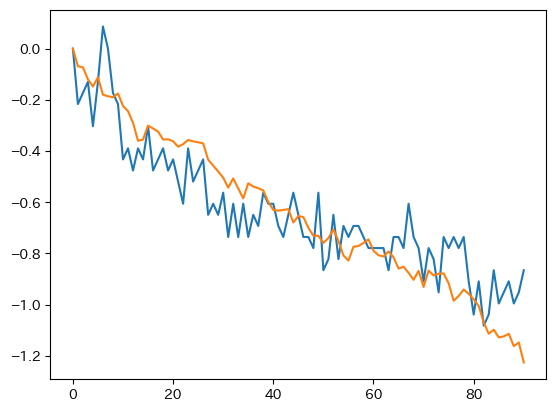

In [82]:
#ダッシュボードのイメージ
v=dic["女性_adult_肥満"][14]
pl=bmi_df.query('uid==@v')
plt.plot((list(pl["bmi_dif"])))
plt.plot(target["女性_adult_肥満"])
plt.show()

fig, axes = plt.s.ubplots(11,1,figsize=(10,30))
i=0
for k,v in target.items():
    axes[i].plot(v)
    axes[i].set_title(k)
    i+=1    
plt.tight_layout()
plt.savefig("target.jpg")
plt.show()

## もう一度可視化

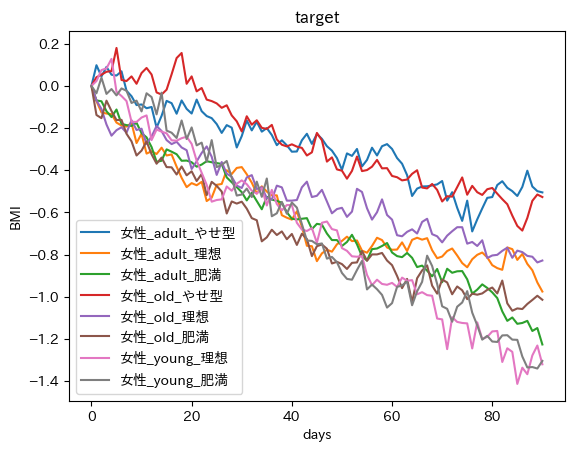

In [83]:
#採集データを一つのグラフで可視化
plt.figure()
i=0
x=range(91)
for k,v in target.items():
    plt.plot(x,v,label=k)
    i+=1
    if i==8:
        break
plt.legend()
plt.title("target")
plt.xlabel("days")
plt.ylabel("BMI")
#plt.savefig("target.jpg")
plt.show()

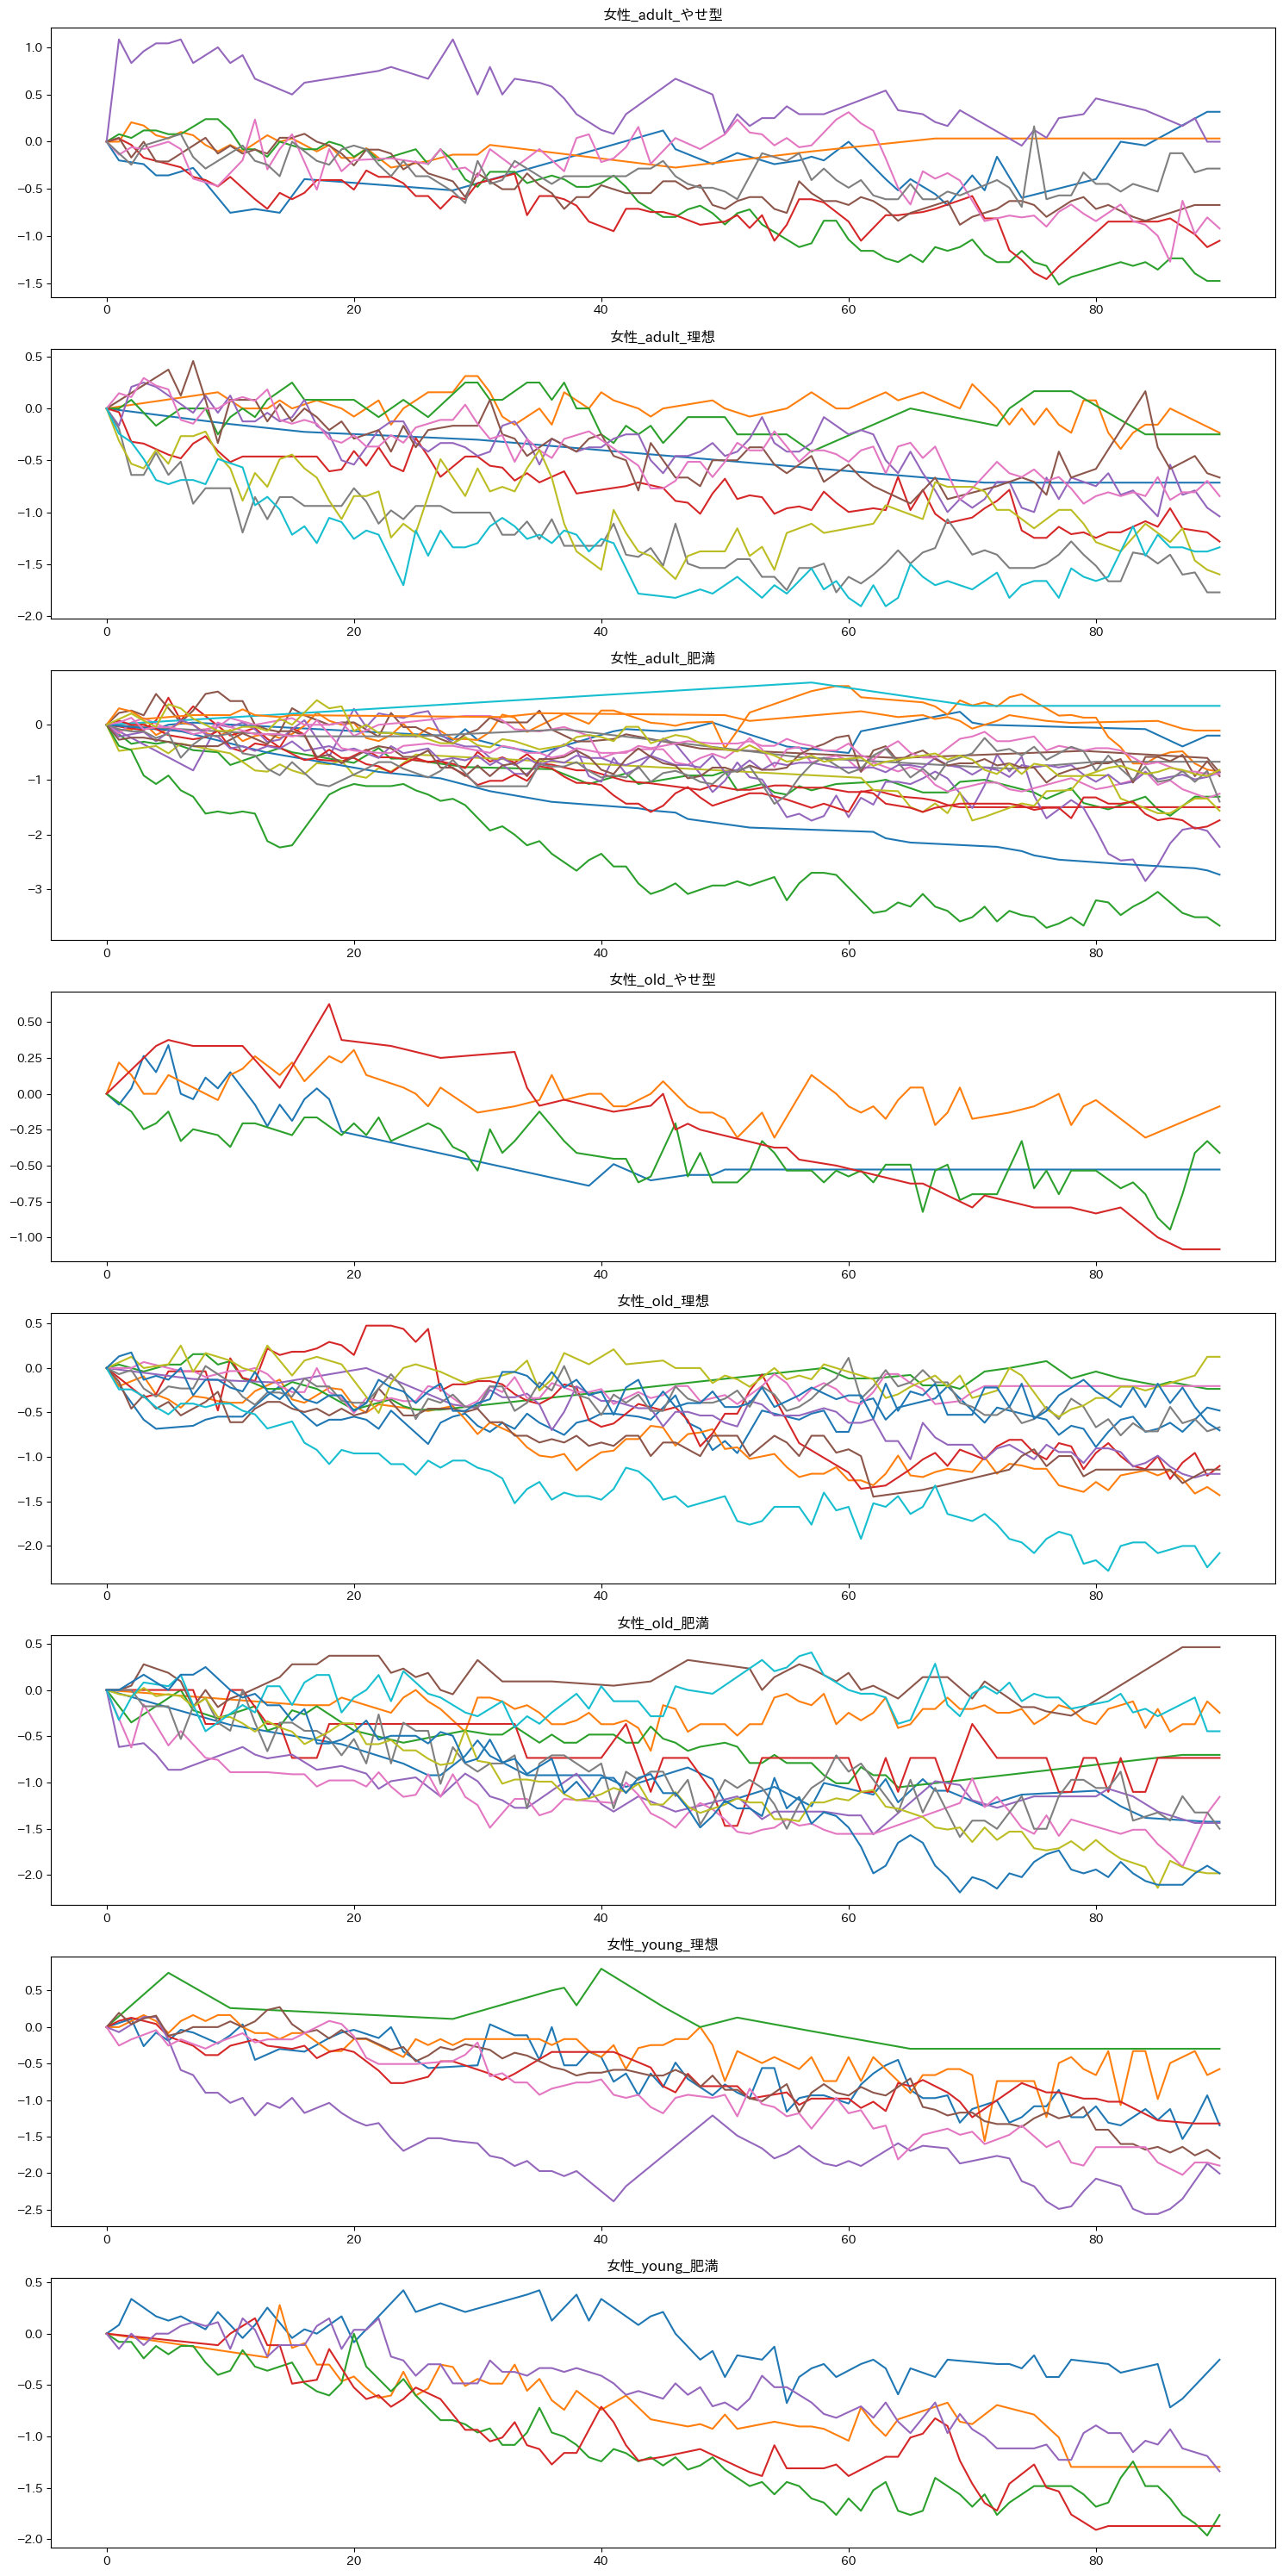

In [84]:
#0～90日を欠かさずすべてを補完したデータで再可視化
fig, axes = plt.subplots(8,1,figsize=(15,30))
i=0
for k,v in dic.items():
    if i == 8 :
        break
    for v in v:
        pl2=bmi_df.query('uid==@v')
        axes[i].plot((list(pl2["bmi_dif"])))
    axes[i].set_title(k)
    i+=1  
plt.tight_layout()
plt.savefig("plot_filled.jpg")
plt.show()

## データ選抜の基準

- 欠損のあるデータ
- 体重のレコード数10以下
- 身長、体重の入力ミス
- 初期BMIが18.5以下
- ダイエット目的でない人（質問より）
- 最初より、最後のBMIが高い人（BMIが増加した人）
- 計測期間が90以下の人

## アイデア

- まず、ユーザーごとの体組成データ件数をカウント
- 開始からの経過日時に計算し直す
- 区分ごとに計算する、1ヶ月や2週間など
- データ頻度を何かしらデータ化
- 複数人の推移をグラフ化してみる
- 学習済みモデルをネットに上げてURLを作ってデータを入れると値が帰ってくるシステム
- prophet

## 質問項目

https://docs.google.com/spreadsheets/d/1Nz1sMwjYuHdiURw3X0zLmIktrEZ-Lnx15zMxhWPZb2g/edit#gid=0

## 参考記事

https://office54.net/python/basic/exception-try-except 例外処理   
https://note.nkmk.me/python-pandas-get-loc-row-column-num/ 行番号、列番号を取得  
https://qiita.com/TakuTaku36/items/91032625e482f2ae6e18 度数分布表  
https://note.nkmk.me/python-pandas-list-as-value/ df内リストの処理  
https://chusotsu-program.com/pandas-groupby-loop/ groupbyの反復処理  
https://datawokagaku.com/dataframe_groupby/ groupby  
https://note.nkmk.me/python-dict-keys-values-items/ dict for文  
https://analytics-note.xyz/programming/dataframe-complement/　日付を揃える  
https://www.lifewithpython.com/2014/01/python-flatten-nested-lists.html flatten  
https://teratail.com/questions/327185 異なるdf平均の取り方  
https://www.sejuku.net/blog/76325 pd.mergeについて  
http://www2.yukawa.kyoto-u.ac.jp/~koudai.sugimoto/dokuwiki/doku.php?id=python:matplotlib:%E3%83%97%E3%83%AD%E3%83%83%E3%83%88%E3%81%AE%E4%BF%9D%E5%AD%98 グラフの保存について  
https://azusa.shinshu-u.ac.jp/~hasegawa/class/programming/index.php?Python/matplotlib%E3%81%A7%E6%97%A5%E6%9C%AC%E8%AA%9E%E6%96%87%E5%AD%97%E5%88%97%E3%82%92%E4%BD%BF%E3%81%86 グラフのタイトルに日本語を使う  

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('max_colwidth',None)